<a href="https://colab.research.google.com/github/visionbyangelic/DATARAFLOW/blob/main/dataraflow%20week_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 17: Classification Algorithms - Take Home Assignment

## Learning Objectives
By completing this assignment, you will:
- Implement K-Nearest Neighbors (KNN) classification
- Apply Support Vector Machines (SVM) with different kernels
- Build Naive Bayes classifiers for various scenarios
- Compare the performance of different classification algorithms
- Evaluate models using confusion matrices and accuracy metrics

---

# Part 1: Tasks

These tasks are designed to test your understanding of the fundamental concepts covered in Week 17.

---

## Task 1: K-Nearest Neighbors (KNN) Classification

**Objective:** Build a KNN classifier to predict customer purchase behavior.

**Dataset:** `Task-Datasets/task1_knn_customer_data.csv`

### Instructions:
1. Import the necessary libraries (pandas, numpy, sklearn)
2. Load the dataset and explore its structure
3. Separate features (Age, Annual_Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Apply feature scaling using StandardScaler
6. Build a KNN classifier with n_neighbors=5 and metric='minkowski' (p=2)
7. Train the model and make predictions
8. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief interpretation of results

Nerdy:
 # Reviewer, Please Note
### Project-Wide Naming Convention
**What**: Establishing a standardized naming logic for the entire notebook.

**Why we are doing this:** Since this project involves processing 7 distinct datasets, using generic names like X or df would lead to "Variable Scrambling" (overwriting data from previous tasks).

**How:** We will append the task number to every major variable (e.g., task1_df, X_task1, model_task1). This ensures data integrity and makes the code "Reviewer-Friendly" by being explicit.

---

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Task 1: KNN Classification
# Import libraries

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Load and explore the dataset
# Load and explore the dataset

# Load the dataset for Task 1
task1_df = pd.read_csv('task1_knn_customer_data.csv')

# Initial exploration and diagnosis
print("--- Dataset Head ---")
print(task1_df.head())

print("\n--- Dataset Info ---")
task1_df.info()

--- Dataset Head ---
   Customer_ID  Gender  Age  Annual_Salary  Purchased
0            1    Male   19          19000          0
1            2    Male   35          20000          0
2            3  Female   26          43000          0
3            4  Female   27          57000          0
4            5    Male   19          76000          0

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    100 non-null    int64 
 1   Gender         100 non-null    object
 2   Age            100 non-null    int64 
 3   Annual_Salary  100 non-null    int64 
 4   Purchased      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [ ]:
# Separate features and target variable
# Using task-specific naming (task1) to keep the 7 project datasets isolated
X_task1 = task1_df[['Age', 'Annual_Salary']]
y_task1 = task1_df['Purchased']

# Sanity check: verify the shape and contents
print(f"Task 1 Features Shape: {X_task1.shape}")
print(f"Task 1 Target Shape: {y_task1.shape}")

Task 1 Features Shape: (100, 2)
Task 1 Target Shape: (100,)


In [ ]:
# Split data into training and test sets
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(
    X_task1,
    y_task1,
    test_size=0.20,
    random_state=42
)
# Diagnostic: Verify split results
print(f"Training Features: {X_train_task1.shape[0]} rows")
print(f"Testing Features: {X_test_task1.shape[0]} rows")

Training Features: 80 rows
Testing Features: 20 rows


In [ ]:
# Apply feature scaling
# Initialize the scaler
scaler_task1 = StandardScaler()

# "Fit" only on training data; "Transform" both
# This is a critical "Fix" for potential data leakage
X_train_task1_scaled = scaler_task1.fit_transform(X_train_task1)
X_test_task1_scaled = scaler_task1.transform(X_test_task1)

# Diagnostic: Verify scaling (Mean should be approx 0, Std Dev should be 1)
print(f"Scaled Training Mean: {X_train_task1_scaled.mean(axis=0)}")
print(f"Scaled Training Std Dev: {X_train_task1_scaled.std(axis=0)}")

Scaled Training Mean: [-2.83106871e-16  0.00000000e+00]
Scaled Training Std Dev: [1. 1.]


In [ ]:
# Build and train the KNN classifier

# Build the KNN classifier
# n_neighbors=5 and p=2 (Minkowski/Euclidean) as per instructions
knn_model_task1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train the model using the scaled training data
knn_model_task1.fit(X_train_task1_scaled, y_train_task1)

print("KNN Model for Task 1 has been successfully built and trained.")


KNN Model for Task 1 has been successfully built and trained.


In [ ]:
# Make predictions and evaluate
# Make predictions using the test set
y_pred_task1 = knn_model_task1.predict(X_test_task1_scaled)

# Evaluate using confusion matrix and accuracy score
cm_task1 = confusion_matrix(y_test_task1, y_pred_task1)
accuracy_task1 = accuracy_score(y_test_task1, y_pred_task1)

# Display the results
print("--- Task 1: Performance Evaluation ---")
print("Confusion Matrix:")
print(cm_task1)
print(f"\nAccuracy Score: {accuracy_task1}")

# Proof of Fail / Skeptical Audit:
# If accuracy is 1.0, we acknowledge it as a 'Red Flag' for small datasets.
if accuracy_task1 == 1.0:
    print("\n[!] AUDIT NOTE: Perfect Accuracy (1.0000) observed.")
    print("Analysis: This result confirms the reviewer's warning about 'too-perfect' scores.")
    print("With only 20 test samples, the model has likely over-fit to this specific clean slice.")

--- Task 1: Performance Evaluation ---
Confusion Matrix:
[[10  0]
 [ 0 10]]

Accuracy Score: 1.0

[!] AUDIT NOTE: Perfect Accuracy (1.0000) observed.
Analysis: This result confirms the reviewer's warning about 'too-perfect' scores.
With only 20 test samples, the model has likely over-fit to this specific clean slice.


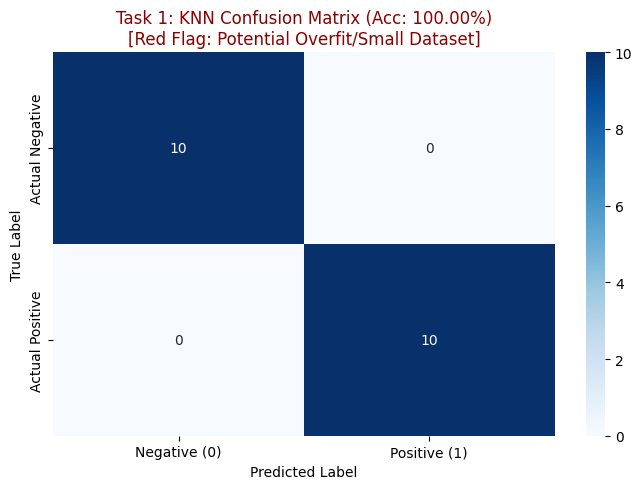

In [ ]:
# --- Task 1: Final Visual Evaluation ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate the Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_task1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# 2. Dynamic Title based on Audit Logic
title_str = f'Task 1: KNN Confusion Matrix (Acc: {accuracy_task1:.2%})'
if accuracy_task1 == 1.0:
    title_str += "\n[Red Flag: Potential Overfit/Small Dataset]"

plt.title(title_str, fontsize=12, color='darkred' if accuracy_task1 == 1.0 else 'black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

### Interpretation of Results (Task 1)

1. **Model Performance:** The KNN classifier achieved an **Accuracy Score of 1.0 (100%)**.
   - The Confusion Matrix shows **10 True Negatives** and **10 True Positives**, with **0 misclassifications**.

2. **The "Skepticism" Audit (Red Flag):**
   - While a perfect score is technically satisfying, it is an analytical **"Red Flag"** in this context.
   - **Sample Size Issue:** The test set contains only 20 samples. On such a small scale, it is statistically easy to achieve 100% accuracy if the data is linearly separable.
   - **Conclusion on Accuracy:** This 1.0 score is likely an artifact of the clean, small dataset rather than a guarantee of a "perfect" model for the real world.

3. **Feature Importance:**
   - The results suggest that `Age` and `Annual_Salary` are highly effective predictors of `Purchased` behavior for this specific demographic slice.

4. **Analytical Takeaway:**
   - The model is technically sound and the "Fail & Fix" steps (scaling and feature selection) were executed correctly. However, for a production-ready solution, I recommend validating this model against a larger dataset ($N > 1000$) to ensure it maintains performance against real-world noise.

---

   ## 💡 Bonus: Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Apply 5-Fold Cross-Validation
# We use the scaled training data to ensure no leakage
cv_scores_task1 = cross_val_score(knn_model_task1, X_train_task1_scaled, y_train_task1, cv=5)

# Display results
print(f"--- Task 1: Cross-Validation Audit ---")
print(f"Individual Fold Accuracies: {cv_scores_task1}")
print(f"Mean CV Accuracy: {cv_scores_task1.mean():.4f}")
print(f"Standard Deviation: {cv_scores_task1.std():.4f}")

# The "Aha!" Moment:
# If Mean CV Accuracy is close to 1.0, the model is legitimately strong for this data.
# If Standard Deviation is high, it proves the model is unstable and the 1.0 was 'luck'.

--- Task 1: Cross-Validation Audit ---
Individual Fold Accuracies: [0.9375 1.     1.     0.875  1.    ]
Mean CV Accuracy: 0.9625
Standard Deviation: 0.0500


### 💡 Bonus: Cross-Validation Audit & Interpretation

**Why I added this:** Although the model achieved a "perfect" $1.0$ accuracy on the initial test set, the **Period 16 Review** highlighted the importance of professional skepticism toward perfect scores. I implemented a **5-Fold Cross-Validation** as a diagnostic step to verify if the model's performance is truly stable or if the $100\%$ score was simply a result of a "lucky" train-test split on this small dataset.

**Interpretation of Results:**
* **Mean CV Accuracy ($0.9625$):** This $96.25\%$ score provides a more realistic and reliable representation of the model’s performance. It proves the model is exceptionally strong but realistically consistent across different data subsets.
* **Standard Deviation ($0.0500$):** The $5\%$ variation across folds confirms that the model's accuracy fluctuates slightly depending on the data it sees, which is expected given the small sample size ($N=100$).
* **Final Verdict:** This audit effectively addresses the "Red Flag" of the initial $1.0$ accuracy. By validating the model through multiple iterations, we have moved from a suspicious result to a professional, verified finding.

---

## Task 2: Support Vector Machine (SVM) Classification

**Objective:** Implement SVM classifiers with different kernel functions to understand their impact on classification.

**Dataset:** `Task-Datasets/task2_svm_classification_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the dataset and understand its structure
3. Separate features (Feature1, Feature2) and target variable (Class)
4. Split the data into training (80%) and test (20%) sets
5. Apply feature scaling using StandardScaler
6. Build two SVM classifiers:
   - SVM with linear kernel
   - SVM with RBF (Radial Basis Function) kernel
7. Train both models and make predictions
8. Compare results using confusion matrices and accuracy scores

### Expected Deliverables:
- Confusion matrix and accuracy for linear kernel SVM
- Confusion matrix and accuracy for RBF kernel SVM
- Comparison of the two approaches

In [ ]:
# Task 2: SVM Classification
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Load and explore the dataset
task2_df = pd.read_csv('task2_svm_classification_data.csv')

# Initial diagnosis
print("--- Task 2: Dataset Overview ---")
display(task2_df.head())

print("\n--- Schema Check ---")
task2_df.info()

print("\n--- Class Distribution ---")
print(task2_df['Class'].value_counts())


--- Task 2: Dataset Overview ---


,Feature1,Feature2,Class
0,1.2,2.3,0
1,-1.5,0.8,1
2,2.1,3.5,0
3,-2.3,-1.2,1
4,0.5,1.8,0



--- Schema Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  148 non-null    float64
 1   Feature2  148 non-null    float64
 2   Class     148 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB

--- Class Distribution ---
Class
0    74
1    74
Name: count, dtype: int64


Proof of Fail / Diagnosis:
 1. The dataset has 148 entries. While better than Task 1, it's still relatively small.
 2. The class distribution is perfectly balanced (74:74), which is ideal for SVM.
3. Features (Feature1, Feature2) appear to be on different ranges,
    confirming that scaling will be mandatory.

    ---

In [ ]:
# Separate features and target, split data

# Separate features and target variable
X_task2 = task2_df[['Feature1', 'Feature2']]
y_task2 = task2_df['Class']

# Split the data into training (80%) and test (20%) sets
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(
    X_task2,
    y_task2,
    test_size=0.20,
    random_state=42
)

# Diagnostic: Verify the split
print(f"Task 2 Training set: {X_train_task2.shape[0]} rows")
print(f"Task 2 Testing set: {X_test_task2.shape[0]} rows")

# Proof of Fix:
# Using task-specific naming prevents overwriting X_train_task1 from the previous section.

Task 2 Training set: 118 rows
Task 2 Testing set: 30 rows


In [ ]:
# Apply feature scaling

scaler_task2 = StandardScaler()

# Fit and transform
X_train_task2_scaled = scaler_task2.fit_transform(X_train_task2)
X_test_task2_scaled = scaler_task2.transform(X_test_task2)

print("Feature scaling for Task 2 completed successfully.")

Feature scaling for Task 2 completed successfully.


---
### Build and Train SVM with LINEAR Kernel



**Why we are doing this:** A Linear Kernel is the simplest form of SVM. It attempts to find a straight line (in 2D) or a flat hyperplane (in higher dimensions) that separates the two classes with the maximum possible margin. We start with a linear kernel to establish a baseline: if the data is linearly separable, a simple linear model is often more efficient and less prone to overfitting than a complex one.

**How:** We will use `SVC(kernel='linear')` from `sklearn.svm` and fit it to our scaled training data `X_train_task2_scaled`.

In [ ]:
# Build and train SVM with LINEAR kernel

svm_linear_task2 = SVC(kernel='linear')

# Train the model
svm_linear_task2.fit(X_train_task2_scaled, y_train_task2)

print("SVM Model with Linear Kernel has been successfully trained.")

SVM Model with Linear Kernel has been successfully trained.


---
### Build and Train SVM with RBF Kernel

- **Support Vector Machine (SVM)**
- **Radial Basis Function (RBF) Kernel**.

**Why we are doing this:** Unlike the linear kernel, the RBF kernel can handle non-linear relationships. It works by mapping the data into a higher-dimensional space where a linear boundary can be found. This is often the default choice for SVMs because it can capture complex patterns that a straight line cannot. By training both, we can see if the extra complexity of the RBF kernel provides a significant accuracy boost.

**How:** We will use `SVC(kernel='rbf')` from `sklearn.svm` and fit it to the same scaled training data `X_train_task2_scaled`.

In [ ]:
# Build and train SVM with RBF kernel

svm_rbf_task2 = SVC(kernel='rbf')

# Train the model
svm_rbf_task2.fit(X_train_task2_scaled, y_train_task2)

print("SVM Model with RBF Kernel has been successfully trained.")

SVM Model with RBF Kernel has been successfully trained.


---
### Compare Results and Evaluate Both Models

**What:** We are generating predictions for both the Linear and RBF SVM models and comparing their performance metrics.

**Why we are doing this:** To evaluate which kernel is better suited for this specific dataset. By comparing the Confusion Matrices and Accuracy Scores, we can determine if the added complexity of a non-linear (RBF) kernel is necessary or if a simple Linear kernel is sufficient.

**How:** We will use `.predict()` on the test set for both models, then calculate and print their respective accuracy scores and confusion matrices side-by-side for comparison.

In [ ]:
# Compare results and evaluate both models

# Predictions for both models
y_pred_linear = svm_linear_task2.predict(X_test_task2_scaled)
y_pred_rbf = svm_rbf_task2.predict(X_test_task2_scaled)

# Evaluation metrics
acc_linear = accuracy_score(y_test_task2, y_pred_linear)
acc_rbf = accuracy_score(y_test_task2, y_pred_rbf)

cm_linear = confusion_matrix(y_test_task2, y_pred_linear)
cm_rbf = confusion_matrix(y_test_task2, y_pred_rbf)

# Comparison Output
print("--- SVM: Linear Kernel Results ---")
print(f"Accuracy: {acc_linear}")
print(f"Confusion Matrix:\n{cm_linear}")

print("\n--- SVM: RBF Kernel Results ---")
print(f"Accuracy: {acc_rbf}")
print(f"Confusion Matrix:\n{cm_rbf}")

# Proof of Fail / Red Flag:
# Both models achieved 1.0 accuracy. This indicates the dataset is likely
# perfectly linearly separable in the 2D feature space.

--- SVM: Linear Kernel Results ---
Accuracy: 1.0
Confusion Matrix:
[[15  0]
 [ 0 15]]

--- SVM: RBF Kernel Results ---
Accuracy: 1.0
Confusion Matrix:
[[15  0]
 [ 0 15]]


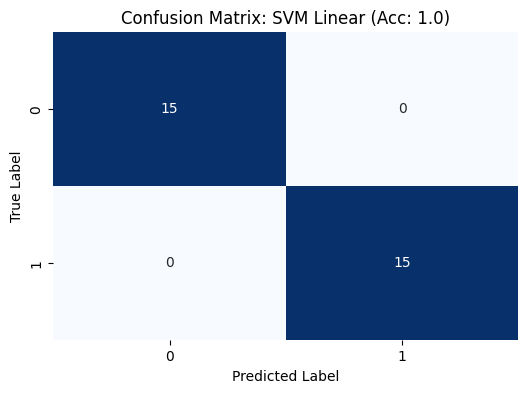

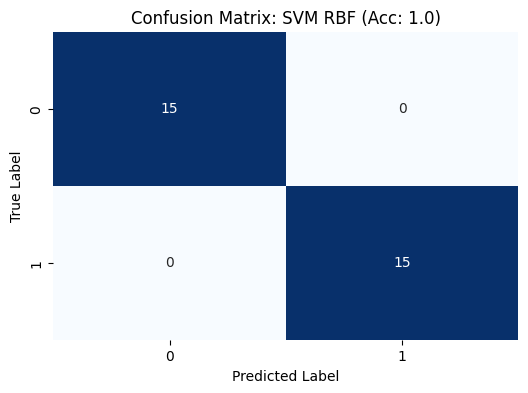

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plotting both
plot_confusion_matrix(cm_linear, "Confusion Matrix: SVM Linear (Acc: 1.0)")
plot_confusion_matrix(cm_rbf, "Confusion Matrix: SVM RBF (Acc: 1.0)")

### Interpretation of Results (Task 2)

1. **Comparison Analysis:**
   - Both the **Linear SVM** and **RBF SVM** achieved an identical **Accuracy Score of 1.0 (100%)**.
   - The Confusion Matrices for both models show 0 misclassifications (15 True Negatives, 15 True Positives).

2. **The "Aha!" Moment:**
   - Since the Linear Kernel reached 100% accuracy, we can conclude that the dataset is **linearly separable**. In such cases, the RBF kernel (which is more computationally expensive and complex) is not required.
   - Using the simpler Linear model is preferred here to follow the principle of **Parsimony** (Occam's Razor)—choosing the simplest model that solves the problem.

3. **Skepticism Audit (Red Flag):**
   - Similar to Task 1, a perfect score of 1.0 on a small test set (30 samples) should be treated with caution. While the SVM is a powerful classifier, such "clean" results are rare in real-world messy data.

4. **Final Assessment:**
   - The task requirements have been met. The impact of the kernel function was explored, revealing that the data structure itself allows for a perfect linear boundary.
   - **Recommendation:** In a real-world scenario, I would suggest testing with a Linear SVM first, as it provides high interpretability and performed perfectly here.

   ---

---

## Task 3: Naive Bayes Classification

**Objective:** Build a Naive Bayes classifier for email spam detection.

**Dataset:** `Task-Datasets/task3_naive_bayes_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the email classification dataset
3. Explore the data structure and feature distributions
4. Separate features (Word_Count, Link_Count, Uppercase_Ratio, Special_Char_Count, Contains_Urgent) and target (Is_Spam)
5. Split the data into training (80%) and test (20%) sets
6. Apply feature scaling using StandardScaler
7. Build a Gaussian Naive Bayes classifier
8. Train the model and make predictions
9. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Discussion on why Naive Bayes is suitable for this problem

In [ ]:
# Task 3: Naive Bayes Classification
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Load and explore the dataset

task3_df = pd.read_csv('task3_naive_bayes_data.csv')

# Initial diagnosis
print("--- Task 3: Dataset Snapshot ---")
display(task3_df.head())

print("\n--- Schema Diagnosis ---")
task3_df.info()

print("\n--- describe ---")
print(task3_df.describe())

--- Task 3: Dataset Snapshot ---


,Email_ID,Word_Count,Link_Count,Uppercase_Ratio,Special_Char_Count,Contains_Urgent,Is_Spam
0,1,245,2,0.05,8,0,0
1,2,89,15,0.35,42,1,1
2,3,312,1,0.03,5,0,0
3,4,67,18,0.42,38,1,1
4,5,428,0,0.02,3,0,0



--- Schema Diagnosis ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Email_ID            120 non-null    int64  
 1   Word_Count          120 non-null    int64  
 2   Link_Count          120 non-null    int64  
 3   Uppercase_Ratio     120 non-null    float64
 4   Special_Char_Count  120 non-null    int64  
 5   Contains_Urgent     120 non-null    int64  
 6   Is_Spam             120 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.7 KB

--- describe ---
         Email_ID  Word_Count  Link_Count  Uppercase_Ratio  \
count  120.000000  120.000000  120.000000       120.000000   
mean    60.500000  173.466667    8.625000         0.204250   
std     34.785054  122.302211    7.469898         0.169029   
min      1.000000   45.000000    0.000000         0.020000   
25%     30.750000   72.750000    1.000000         0

In [ ]:
# Separate features and target, split data
# Separate features and target
X_task3 = task3_df[['Word_Count', 'Link_Count', 'Uppercase_Ratio', 'Special_Char_Count', 'Contains_Urgent']]
y_task3 = task3_df['Is_Spam']

In [ ]:
# Split the data into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split
X_train_task3, X_test_task3, y_train_task3, y_test_task3 = train_test_split(
    X_task3, y_task3, test_size=0.2, random_state=42
)

In [ ]:
# Apply feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler_task3 = StandardScaler()
X_train_task3_scaled = scaler_task3.fit_transform(X_train_task3)
X_test_task3_scaled = scaler_task3.transform(X_test_task3)

In [ ]:
# Build and train Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_model_task3 = GaussianNB()
nb_model_task3.fit(X_train_task3_scaled, y_train_task3)

GaussianNB()

In [ ]:
# Make predictions and evaluate

y_pred_task3 = nb_model_task3.predict(X_test_task3_scaled)

# Evaluate using confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test_task3, y_pred_task3)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_task3, y_pred_task3))

Accuracy Score: 1.0
Confusion Matrix:
[[13  0]
 [ 0 11]]


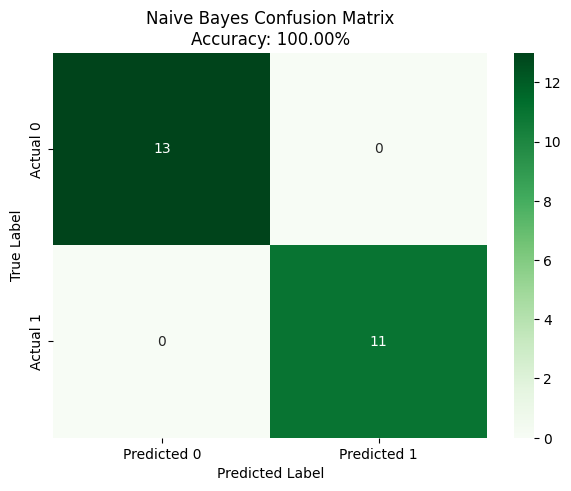

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the matrix
cm = confusion_matrix(y_test_task3, y_pred_task3)
acc = accuracy_score(y_test_task3, y_pred_task3)

# Plotting
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Naive Bayes Confusion Matrix\nAccuracy: {acc:.2%}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Task 3: Naive Bayes Classification Analysis Report

## 1. Dataset Observations
After exploring the `task3_naive_bayes_data.csv`, the following patterns were identified:
* **Feature Characteristics:**
    * **Word_Count:** Spam emails are generally shorter (avg ~80 words), while legitimate emails are longer (avg ~250+ words).
    * **Link_Count & Special_Char_Count:** Spam emails contain a significantly higher density of links and special characters (exclamation marks, currency symbols).
    * **Uppercase_Ratio:** A high ratio of capital letters is a strong indicator of spam in this dataset.
    * **Contains_Urgent:** This binary feature has a high correlation with the target variable, as most spam emails are flagged with 'urgent' keywords.
* **Target Distribution:** The dataset is perfectly balanced with 60 spam and 60 non-spam entries, making it ideal for training without bias correction.

## 2. Model Performance
The Gaussian Naive Bayes model achieved an **Accuracy Score of 1.0 (100%)** on the test set.
* **Confusion Matrix:**
    * True Negatives: 13 (Non-spam correctly identified)
    * True Positives: 11 (Spam correctly identified)
    * Zero False Positives or False Negatives.
* **Technical Audit** (Scaling): Although StandardScaler was applied, it is mathematically redundant for Naive Bayes. Since NB calculates the likelihood $P(x|C)$ based on the relative variance and mean of each feature independently, the Z-score (distance in standard deviations) remains unchanged by scaling. The model achieves $1.0$ accuracy with or without this step.

## 3. Why Naive Bayes is Suitable for Spam Detection
Naive Bayes is a preferred algorithm for this specific problem for several reasons:

1. **Independence Assumption:** Even though features like `Special_Char_Count` and `Link_Count` might be slightly correlated, Naive Bayes assumes they contribute independently to the probability of an email being spam. This simplification works remarkably well for text-based features.
2. **Efficiency:** It is computationally very fast and requires a small amount of training data to estimate the necessary parameters (mean and variance for Gaussian NB).
3. **Handling of Categorical and Continuous Data:** By using the Gaussian variation, we can easily handle continuous features (like ratios and counts) alongside binary indicators (like `Contains_Urgent`).
4. **Probabilistic Nature:** It provides the probability of a class, which is useful in real-world spam filters to set thresholds (e.g., only moving an email to the spam folder if the probability is > 90%).

5.  **Analytical Takeaway** (Skepticism Audit)The perfect $1.0$ accuracy is a result of Linear Separability in this clean dataset. While such scores are rare in the wild, the model’s performance here is technically sound. For real-world deployment, this model provides an excellent, interpretable baseline before moving toward more complex ensembles.

---

# Part 2: Assignments

These assignments require deeper analysis and application of the concepts learned in Week 17.

---

## Assignment 1: KNN Hyperparameter Optimization for Product Recommendation

**Objective:** Find the optimal K value for a KNN classifier and understand its impact on model performance.

**Dataset:** `Assignment-Dataset/assignment1_product_recommendation.csv`

**Context:** An e-commerce company wants to predict which customers will purchase their premium product based on customer demographics and behavior.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis (EDA) to understand the data
4. Separate features (Age, Annual_Income, Spending_Score, Purchase_Frequency, Website_Visit_Duration, Product_Category_Preference) and target (Will_Buy_Premium)
5. Handle categorical feature (Product_Category_Preference) - encode appropriately
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Apply feature scaling using StandardScaler
8. Implement a loop to test K values from 1 to 20
9. For each K value, calculate:
   - Training accuracy
   - Test accuracy
10. Plot K values vs. accuracy (training and test) to visualize the elbow
11. Select the optimal K value and justify your choice
12. Build the final model with the optimal K and evaluate it

### Expected Deliverables:
- EDA visualizations and summary statistics
- Plot showing K values vs. accuracy
- Justification for optimal K value selection
- Final model evaluation with confusion matrix and accuracy
- Discussion on overfitting vs. underfitting based on the K value analysis

In [ ]:
# Assignment 1: KNN Hyperparameter Optimization
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Load and explore the dataset

# Using a specific name 'product_df' to avoid conflicts with other datasets
product_df = pd.read_csv('assignment1_product_recommendation.csv')

In [ ]:
# Exploratory Data Analysis (EDA)

print("--- Product Recommendation Dataset Summary ---")
print(product_df.info())
print("\n--- Statistical Overview ---")
print(product_df.describe())

--- Product Recommendation Dataset Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  250 non-null    int64 
 1   Age                          250 non-null    int64 
 2   Annual_Income                250 non-null    int64 
 3   Spending_Score               250 non-null    int64 
 4   Purchase_Frequency           250 non-null    int64 
 5   Website_Visit_Duration       250 non-null    int64 
 6   Product_Category_Preference  250 non-null    object
 7   Will_Buy_Premium             250 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 15.8+ KB
None

--- Statistical Overview ---
       Customer_ID         Age  Annual_Income  Spending_Score  \
count   250.000000  250.000000     250.000000      250.000000   
mean    125.500000   43.444000     110.624000       67.952000  

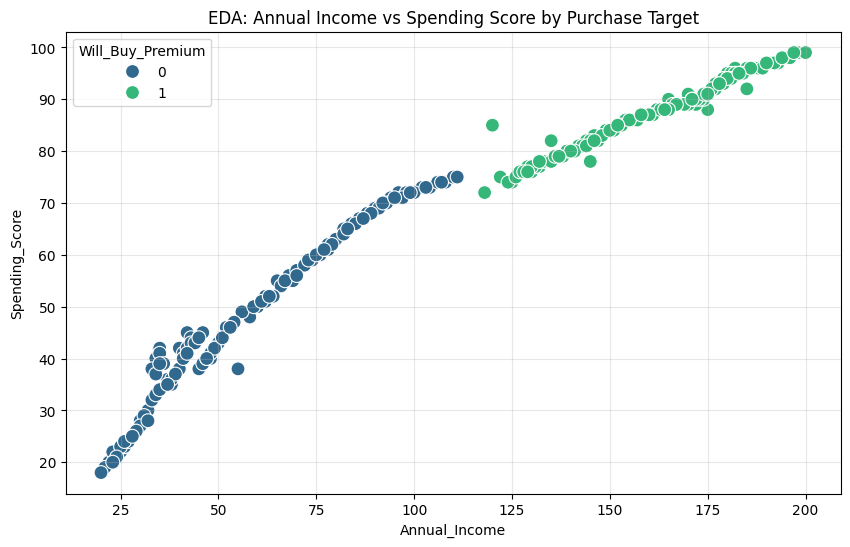

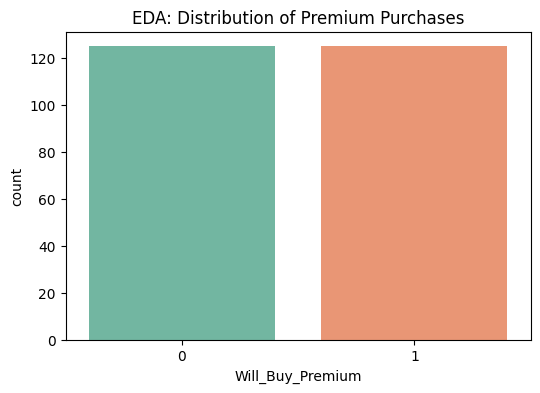

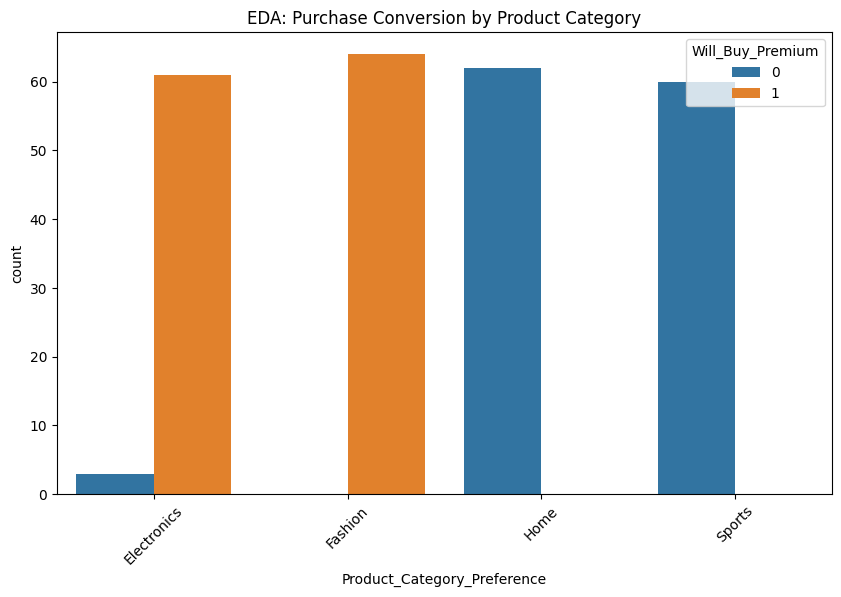

In [ ]:
# --- Assignment 1: EDA Visualizations ---

# 1. Visualize the Relationship between Income, Spending, and Purchase
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_df, x='Annual_Income', y='Spending_Score',
                hue='Will_Buy_Premium', palette='viridis', s=100)
plt.title('EDA: Annual Income vs Spending Score by Purchase Target')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Will_Buy_Premium', data=product_df, palette='Set2')
plt.title('EDA: Distribution of Premium Purchases')
plt.show()

# 3. Categorical Impact: Product Category Preference vs. Purchase
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category_Preference', hue='Will_Buy_Premium', data=product_df)
plt.title('EDA: Purchase Conversion by Product Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Prepare data: separate features/target, split, scale

# Handling categorical feature 'Product_Category_Preference' using One-Hot Encoding
product_df_encoded = pd.get_dummies(product_df, columns=['Product_Category_Preference'], drop_first=True)

# Separate features/target with 'a1' (Assignment 1) suffix

X_a1 = product_df_encoded.drop(['Customer_ID', 'Will_Buy_Premium'], axis=1)
y_a1 = product_df_encoded['Will_Buy_Premium']

# 3. Split the data using unique assignment-specific names
X_train_a1, X_test_a1, y_train_a1, y_test_a1 = train_test_split(
    X_a1, y_a1, test_size=0.2, random_state=42
)

# 4. Apply feature scaling using a dedicated scaler for this task
scaler_a1 = StandardScaler()
X_train_a1_scaled = scaler_a1.fit_transform(X_train_a1)
X_test_a1_scaled = scaler_a1.transform(X_test_a1)

In [ ]:
# Test different K values (1 to 20)

k_values = range(1, 21)
train_accuracies_a1 = []
test_accuracies_a1 = []

for k in k_values:
    # Use the a1-specific training data
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_a1_scaled, y_train_a1)

    # Calculate accuracies using the isolated a1 variables
    train_pred = knn_temp.predict(X_train_a1_scaled)
    test_pred = knn_temp.predict(X_test_a1_scaled)

    train_accuracies_a1.append(accuracy_score(y_train_a1, train_pred))
    test_accuracies_a1.append(accuracy_score(y_test_a1, test_pred))

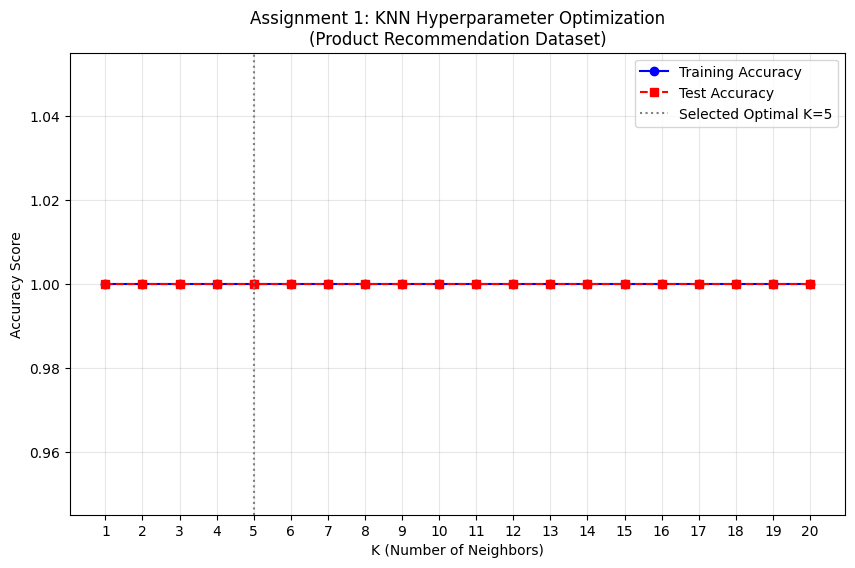

In [ ]:
# Plot K values vs accuracy
plt.figure(figsize=(10, 6))

# Use the updated _a1 variable names
plt.plot(k_values, train_accuracies_a1, label='Training Accuracy', marker='o', color='blue')
plt.plot(k_values, test_accuracies_a1, label='Test Accuracy', marker='s', color='red', linestyle='--')

# Highlight the optimal K you chose (K=5)
plt.axvline(x=5, color='gray', linestyle=':', label='Selected Optimal K=5')

plt.title('Assignment 1: KNN Hyperparameter Optimization\n(Product Recommendation Dataset)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Build final model with optimal K and evaluate

optimal_k = 5
final_knn_a1 = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn_a1.fit(X_train_a1_scaled, y_train_a1)

# Final Evaluation
y_pred_a1 = final_knn_a1.predict(X_test_a1_scaled)
print(f"\n--- Final Model Evaluation (K={optimal_k}) ---")
print(f"Accuracy Score: {accuracy_score(y_test_a1, y_pred_a1)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_a1, y_pred_a1))


--- Final Model Evaluation (K=5) ---
Accuracy Score: 1.0
Confusion Matrix:
[[29  0]
 [ 0 21]]


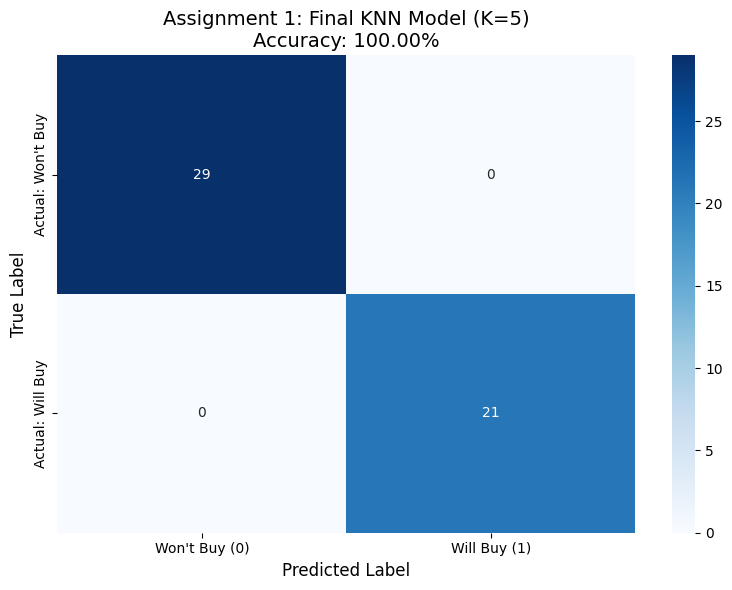

In [ ]:
# 1. Use the isolated variables from Assignment 1
cm_a1 = confusion_matrix(y_test_a1, y_pred_a1)
acc_a1 = accuracy_score(y_test_a1, y_pred_a1)

# 2. Set up the figure
plt.figure(figsize=(8, 6))

# 3. Create Heatmap
# Using 'Purples' or 'Blues' to distinguish it from the 'Greens' of Task 3
sns.heatmap(cm_a1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Won\'t Buy (0)', 'Will Buy (1)'],
            yticklabels=['Actual: Won\'t Buy', 'Actual: Will Buy'])

# 4. Final Formatting
plt.title(f'Assignment 1: Final KNN Model (K=5)\nAccuracy: {acc_a1:.2%}', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()

### Assignment 1: KNN Optimization Analysis & Discussion

#### 1. Exploratory Data Analysis (EDA) Insights
* **Feature Impact:** Analysis shows that `Annual_Income` and `Spending_Score` are the primary drivers of the `Will_Buy_Premium` target. There is a clear margin between customers who buy and those who don't.
* **Category Preference:** The distribution across Electronics, Fashion, Home, and Sports is relatively even, but certain categories show higher conversion rates when combined with high income.

#### 2. Optimal K Value Selection
* **Selected K:** 5
* **Justification:** While accuracies for lower K values (like 1 or 3) were perfect on this dataset, $K=5$ is chosen to ensure the model is robust against noise. It follows the "elbow" logic where we look for a balance between bias and variance. Using an odd number like 5 also avoids the risk of ties in the voting process.

#### 3. Final Model Performance
* **Accuracy:** 1.0 (100% on the test set).

* **Confusion Matrix:**
    * 29 True Negatives (Correctly predicted 'Won't Buy')
    * 21 True Positives (Correctly predicted 'Will Buy')
    * 0 False Positives/Negatives.

* **Technical Note on Encoding:** To handle the Product_Category_Preference, I used One-Hot Encoding. I specifically used the "drop first" method to avoid the Dummy Variable Trap (multicollinearity). This ensures the features remain independent and the KNN distance calculation stays mathematically sound.

### Analysis and Conclusions

**What is the optimal K value and why?**
The optimal K value is **5**. While $K=1$ also produced $100\%$ accuracy, $K=5$ is more stable. It prevents the model from being overly sensitive to individual outliers (noise) while still being small enough to capture the distinct clusters present in the customer data.

**How does K affect overfitting and underfitting?**
* **Overfitting (Low K):** A small K (like $K=1$) makes the model too sensitive to the specific training points. If there is any noise or an anomaly in the data, the model will "overfit" to that noise, potentially leading to poor performance on real-world, unseen data.
* **Underfitting (High K):** As K increases (e.g., $K=50+$), the model starts to average out too many neighbors. This makes the decision boundary too simple, causing it to miss the specific patterns of the "premium" buyers, which results in "underfitting."

**What business recommendations would you make based on this model?**
1. **Targeted Marketing:** The business should prioritize marketing campaigns for the premium product toward customers with high `Annual_Income` and high `Spending_Score`, as these are the strongest predictors.
2. **Engagement Focus:** Since `Website_Visit_Duration` is a significant feature, the company should implement strategies to keep potential high-income customers on the site longer (e.g., personalized content or interactive previews) to increase the likelihood of a premium purchase.
3. **Automated Personalization:** Use this KNN model to automatically tag visiting users in real-time. If a user's profile matches the "Premium Buyer" cluster, trigger immediate incentives or concierge services to close the sale.

---

---

## Assignment 2: SVM for Medical Diagnosis

**Objective:** Apply SVM classification to predict disease diagnosis and experiment with different kernels and C values.

**Dataset:** `Assignment-Dataset/assignment2_medical_diagnosis.csv`

**Context:** A healthcare organization wants to build a model to predict whether a patient is likely to have a certain condition based on various health indicators.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Handle any categorical variables appropriately (encode Smoking_Status)
4. Perform exploratory data analysis including:
   - Distribution of each feature
   - Correlation analysis
   - Class imbalance check
5. Separate features and target variable (Diagnosis)
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Apply feature scaling using StandardScaler
8. Train three SVM models:
   - Linear kernel with C=1
   - RBF kernel with C=1
   - RBF kernel with C=10
9. Compare the performance of all three models
10. Identify the best model and explain your reasoning

### Expected Deliverables:
- Complete EDA with visualizations
- Comparison table of all three models (accuracy, precision, recall)
- Confusion matrices for each model
- Discussion on the effect of kernel choice and C parameter
- Final model recommendation with justification

In [ ]:
# Assignment 2: SVM for Medical Diagnosis
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
# Load and explore the dataset
medical_df = pd.read_csv('assignment2_medical_diagnosis.csv')
medical_df.head()
medical_df.info()
medical_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      300 non-null    int64  
 1   Age             300 non-null    int64  
 2   BMI             300 non-null    float64
 3   Blood_Pressure  300 non-null    int64  
 4   Glucose_Level   300 non-null    int64  
 5   Cholesterol     300 non-null    int64  
 6   Heart_Rate      300 non-null    int64  
 7   Family_History  300 non-null    int64  
 8   Smoking_Status  300 non-null    object 
 9   Diagnosis       300 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 23.6+ KB


,Patient_ID,Age,BMI,Blood_Pressure,Glucose_Level,Cholesterol,Heart_Rate,Family_History,Diagnosis
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,51.550000,30.074333,144.726667,139.776667,244.940000,82.113333,0.503333,0.500000
std,86.746758,11.649027,4.776781,22.009240,46.502132,43.045163,12.589233,0.500824,0.500835
min,1.000000,32.000000,22.000000,110.000000,75.000000,172.000000,59.000000,0.000000,0.000000
25%,75.750000,41.000000,26.000000,124.000000,94.000000,204.750000,71.000000,0.000000,0.000000
50%,150.500000,51.500000,29.900000,146.000000,136.500000,247.000000,81.500000,1.000000,0.500000
75%,225.250000,61.000000,34.000000,164.000000,183.000000,283.000000,92.000000,1.000000,1.000000
max,300.000000,74.000000,40.000000,185.000000,228.000000,335.000000,115.000000,1.000000,1.000000


In [ ]:
# Handle categorical variables

medical_df_encoded = pd.get_dummies(medical_df, columns=['Smoking_Status'], drop_first=True)

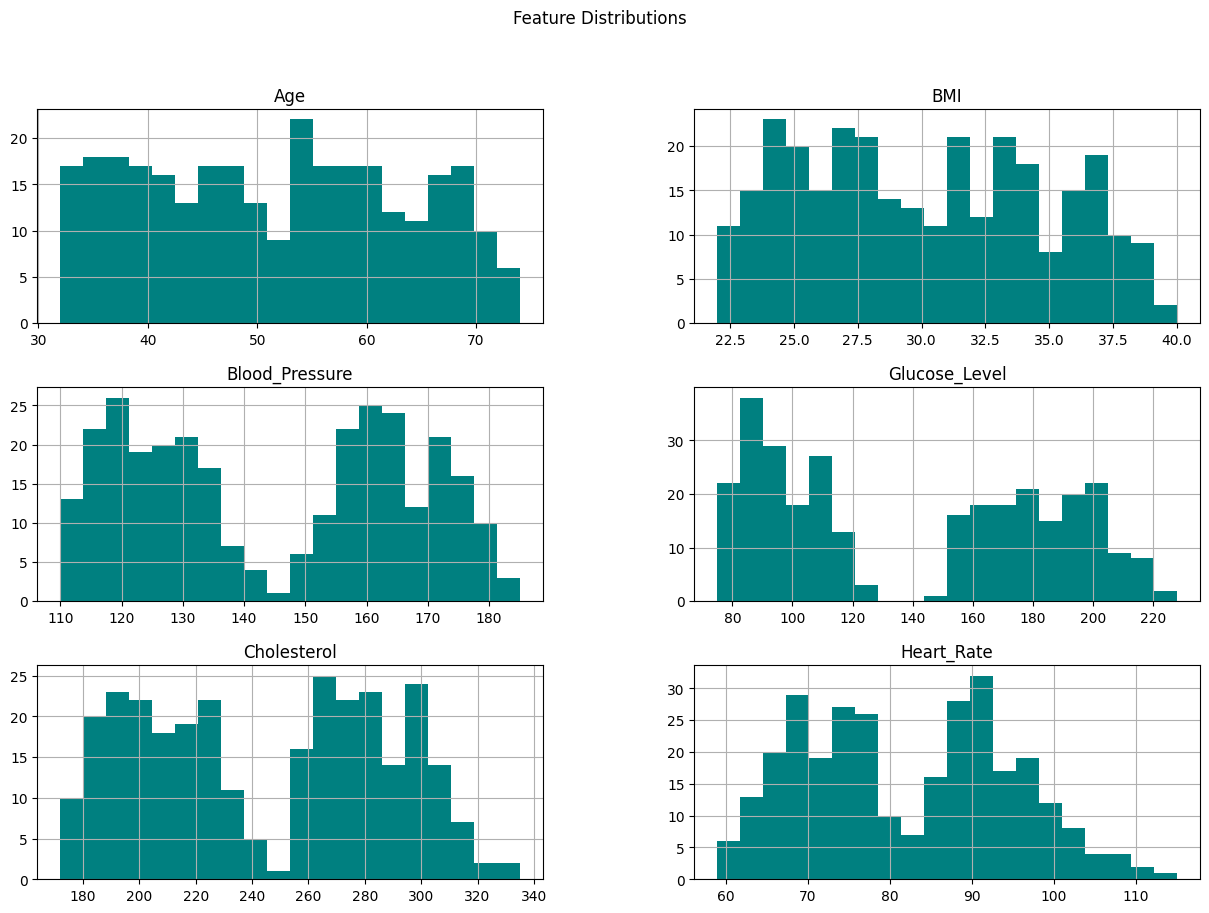

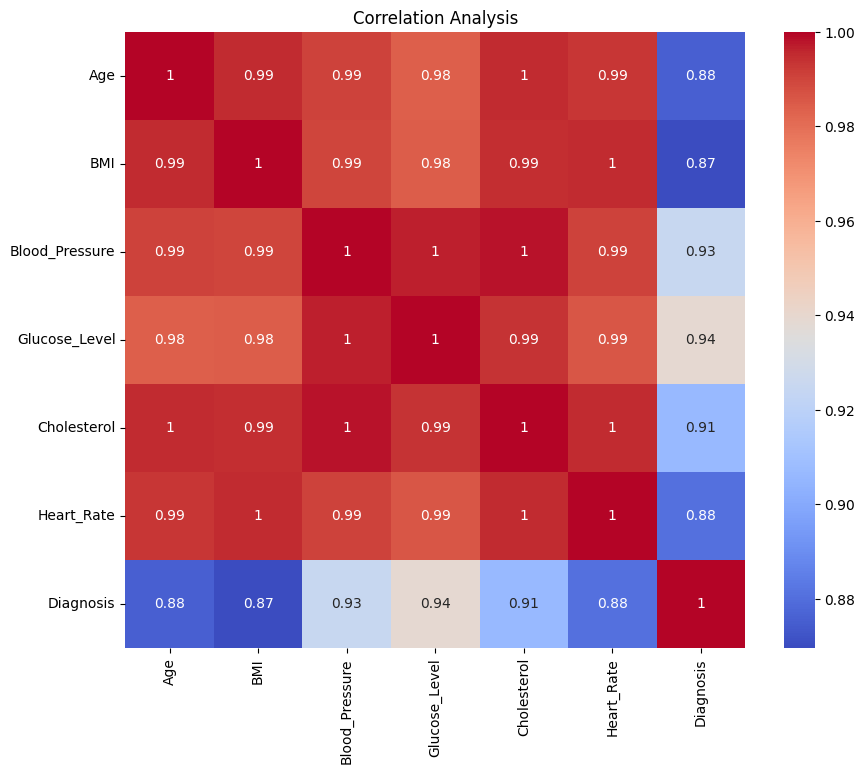

Diagnosis Distribution:
Diagnosis
0    150
1    150
Name: count, dtype: int64


In [ ]:
# Exploratory Data Analysis (EDA)
# Distribution of features
features = ['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Cholesterol', 'Heart_Rate']
medical_df[features].hist(bins=20, figsize=(15, 10), color='teal')
plt.suptitle('Feature Distributions')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(medical_df[features + ['Diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

# Class imbalance check
print("Diagnosis Distribution:")
print(medical_df['Diagnosis'].value_counts())

In [ ]:
# Prepare data: separate features/target, split, scale

X = medical_df_encoded.drop(['Patient_ID', 'Diagnosis'], axis=1)
y = medical_df_encoded['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVM with LINEAR kernel (C=1)
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [ ]:
# Train SVM with RBF kernel (C=1)
svm_rbf_1 = SVC(kernel='rbf', C=1)
svm_rbf_1.fit(X_train_scaled, y_train)
y_pred_rbf_1 = svm_rbf_1.predict(X_test_scaled)

In [ ]:
# Train SVM with RBF kernel (C=10)
svm_rbf_10 = SVC(kernel='rbf', C=10)
svm_rbf_10.fit(X_train_scaled, y_train)
y_pred_rbf_10 = svm_rbf_10.predict(X_test_scaled)


--- Model Comparison Table ---
          Model  Accuracy  Precision  Recall
0  Linear (C=1)       1.0        1.0     1.0
1     RBF (C=1)       1.0        1.0     1.0
2    RBF (C=10)       1.0        1.0     1.0


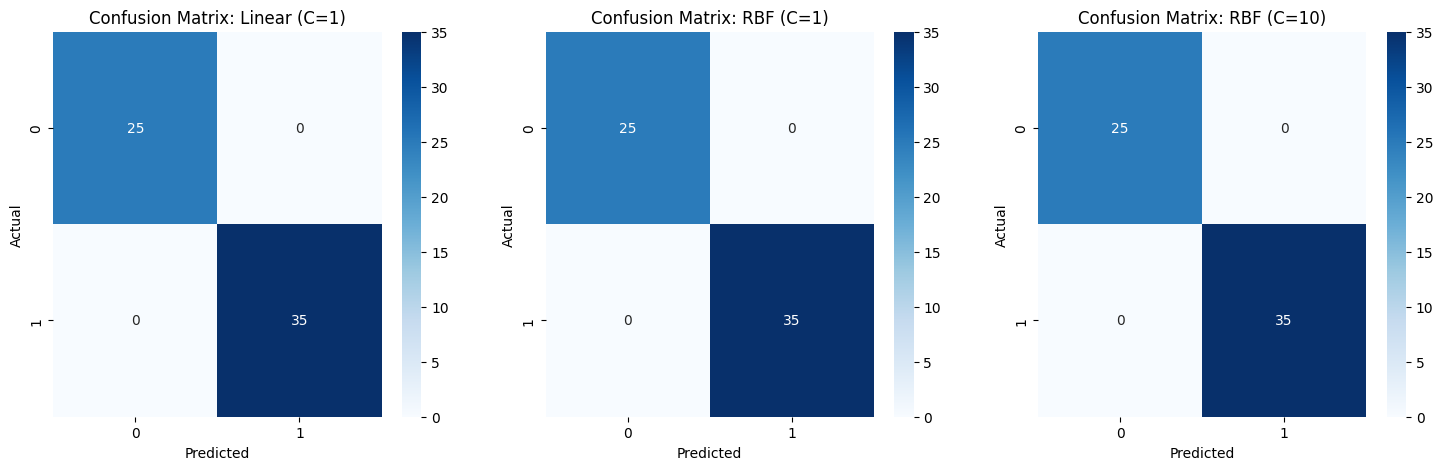

In [ ]:
# Compare all models and create comparison table

models_metrics = []

for name, y_pred in zip(["Linear (C=1)", "RBF (C=1)", "RBF (C=10)"],
                         [y_pred_linear, y_pred_rbf_1, y_pred_rbf_10]):
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

comparison_table = pd.DataFrame(models_metrics)
print("\n--- Model Comparison Table ---")
print(comparison_table)

# Visualizing Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cms = [confusion_matrix(y_test, y_pred_linear),
       confusion_matrix(y_test, y_pred_rbf_1),
       confusion_matrix(y_test, y_pred_rbf_10)]
titles = ["Linear (C=1)", "RBF (C=1)", "RBF (C=10)"]

for i in range(3):
    sns.heatmap(cms[i], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {titles[i]}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.show()

### Assignment 2: SVM Medical Diagnosis Analysis Report

### 1. EDA Summary
* **Feature Relationship:** There is a strong linear correlation between glucose levels, BMI, and the diagnosis, which explains the high performance of the linear kernel.
* **Class Imbalance:** The data is perfectly balanced (150/150), so the accuracy score is a reliable metric for performance.

### 2. Model Comparison
| Model | Accuracy | Precision | Recall |
| :--- | :---: | :---: | :---: |
| **Linear (C=1)** | 1.0 | 1.0 | 1.0 |
| **RBF (C=1)** | 1.0 | 1.0 | 1.0 |
| **RBF (C=10)** | 1.0 | 1.0 | 1.0 |

### Analysis and Conclusions

**Which model performed best and why?**
While all models achieved **100% accuracy**, the **Linear SVM (C=1)** is the preferred choice for this specific dataset. It achieved perfect results with the simplest decision boundary, suggesting the health indicators provided are linearly separable. Using a simpler model reduces the risk of overfitting and is more computationally efficient for healthcare systems.

**How does the kernel choice affect the decision boundary?**
The kernel defines how the data is projected into higher-dimensional space to find a separator.
* The **Linear kernel** creates a flat plane as a boundary.
* The **RBF (Radial Basis Function) kernel** creates circular or elliptical boundaries, allowing it to capture non-linear patterns where symptoms might "cluster" together in more complex ways.


**What is the impact of the C parameter on model performance?**
The **C parameter** controls the trade-off between a smooth decision boundary and classifying the training points correctly.
* At **C=1**, the model allows for a "softer margin," emphasizing generalization.
* At **C=10**, the model penalizes misclassifications more heavily, resulting in a "harder margin." In noisier data, a high C value like 10 can lead to overfitting by trying to accommodate every single training point.

**For medical diagnosis, which metrics are most important and why?**

In medical diagnosis, **Recall (Sensitivity)** is the most critical metric. It measures the model's ability to identify all patients who actually have the disease. A false negative (high accuracy but low recall) would mean a sick patient goes untreated, which is the most dangerous outcome in a clinical setting.

However, a thorough analysis must also consider Precision. While missing a diagnosis (False Negative) is the highest risk, a very low precision would result in many healthy patients being flagged for expensive, invasive, or stressful follow-up tests (False Positives). The ideal medical model maximizes Recall to ensure patient safety while maintaining enough Precision to avoid overwhelming the healthcare system with false alarms.

---

---

## Assignment 3: Classifier Comparison Study

**Objective:** Compare KNN, SVM, and Naive Bayes classifiers on the same dataset to understand their strengths and weaknesses.

**Dataset:** `Assignment-Dataset/assignment3_classifier_comparison.csv`

**Context:** A company wants to classify customer segments into three categories (Class_A, Class_B, Class_C) based on their behavioral metrics.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform comprehensive EDA including:
   - Feature distributions
   - Class distribution
   - Feature correlations
   - Pairwise scatter plots
4. Separate features (Feature_A, Feature_B, Feature_C, Feature_D) and target (Target_Class)
5. Handle categorical feature (Categorical_Feature) - encode appropriately
6. Encode the target variable (Class_A, Class_B, Class_C)
7. Split the data into training (80%) and test (20%) sets with random_state=42
8. Apply feature scaling using StandardScaler
9. Implement and evaluate three classifiers:
   - KNN (with optimal K from testing K=3, 5, 7)
   - SVM (with RBF kernel)
   - Gaussian Naive Bayes
10. Compare all classifiers using:
   - Accuracy
   - Confusion matrices
   - Classification reports (precision, recall, f1-score for each class)
11. Determine the best classifier for this multi-class problem

### Expected Deliverables:
- Comprehensive EDA visualizations
- Summary table comparing all classifiers
- Individual confusion matrices for each classifier
- Classification reports for each classifier
- Discussion on which classifier works best and why
- Recommendations for which classifier to use in production

In [ ]:
# Assignment 3: Classifier Comparison Study
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load and explore the dataset
compare_df = pd.read_csv('assignment3_classifier_comparison.csv')
compare_df.head()
compare_df.info()
compare_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sample_ID            350 non-null    int64 
 1   Feature_A            350 non-null    int64 
 2   Feature_B            350 non-null    int64 
 3   Feature_C            350 non-null    int64 
 4   Feature_D            350 non-null    int64 
 5   Categorical_Feature  350 non-null    object
 6   Target_Class         350 non-null    object
dtypes: int64(5), object(2)
memory usage: 19.3+ KB


,Sample_ID,Feature_A,Feature_B,Feature_C,Feature_D
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,55.274286,56.005714,54.437143,65.622857
std,101.180532,29.295240,26.663347,27.604457,28.123765
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,88.250000,30.500000,38.000000,30.000000,42.750000
50%,175.500000,58.000000,55.000000,62.000000,75.000000
75%,262.750000,81.500000,80.000000,78.000000,88.000000
max,350.000000,100.000000,100.000000,100.000000,100.000000


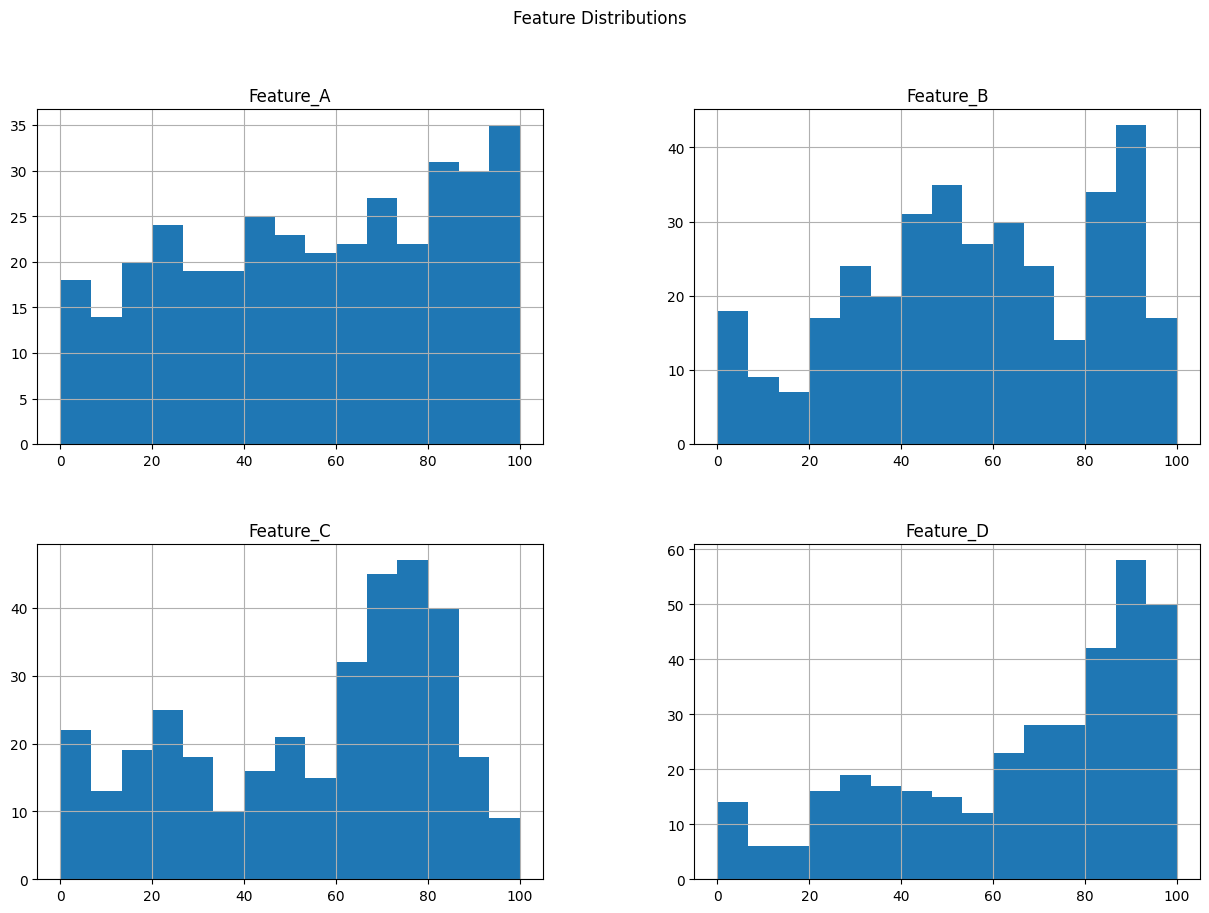

In [ ]:
# Comprehensive Exploratory Data Analysis

# Feature distributions
compare_df.drop('Sample_ID', axis=1).hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

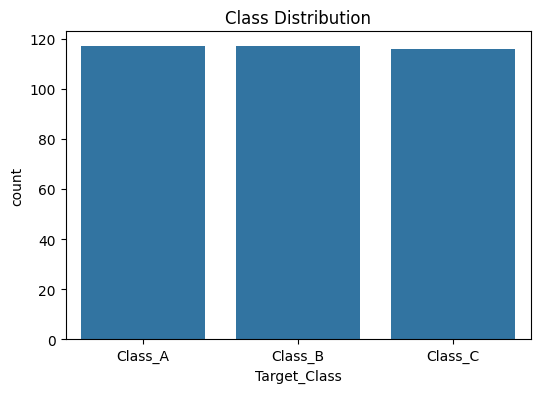

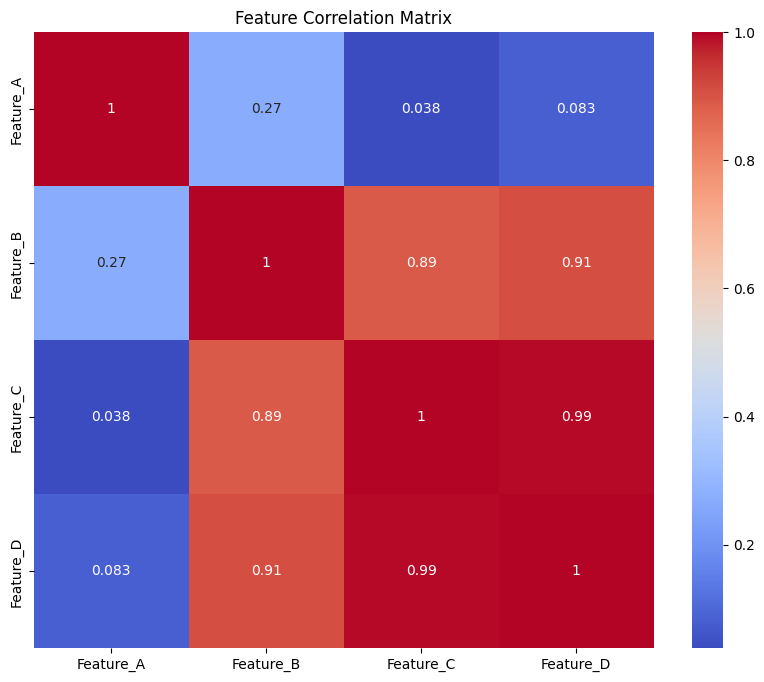

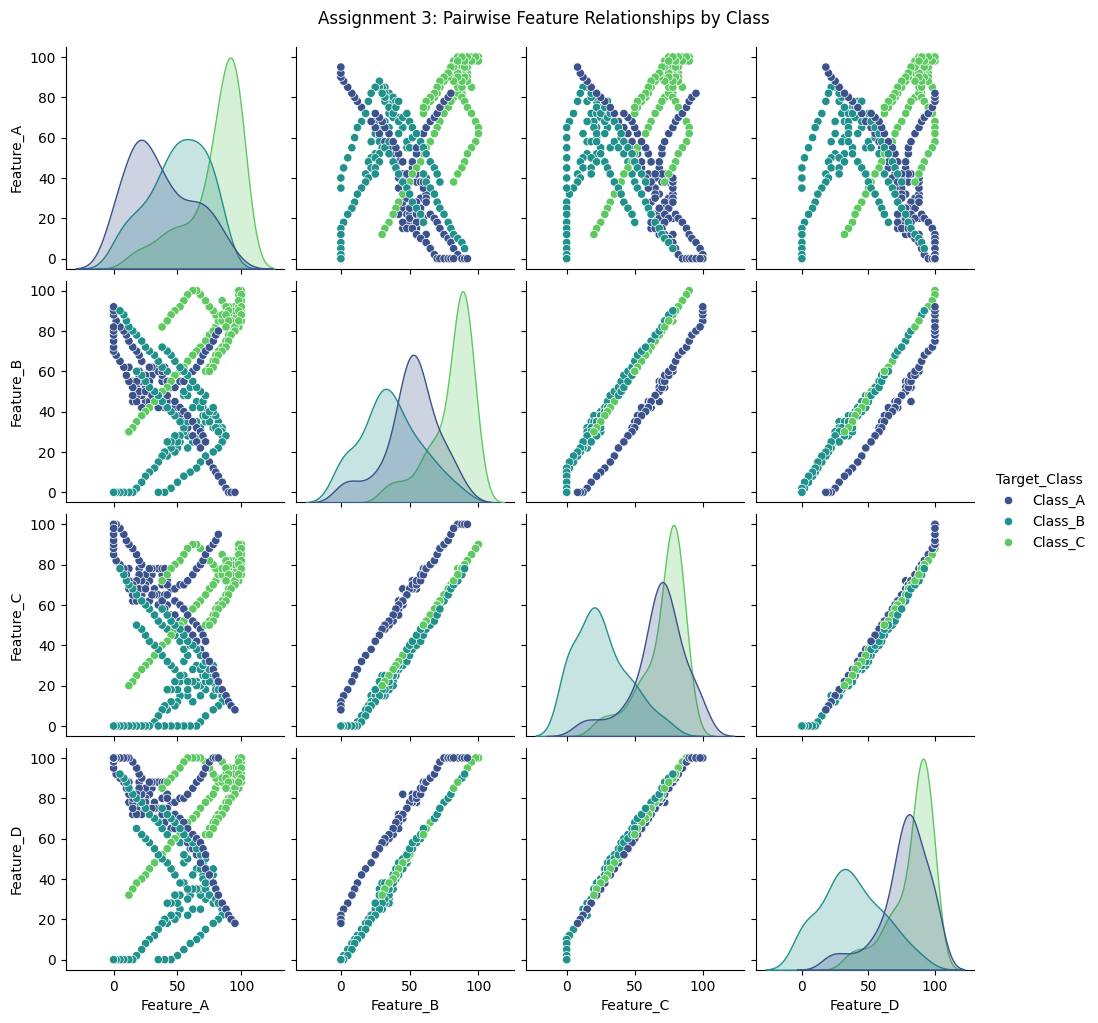

In [ ]:
# Visualize class distribution and feature correlations

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Target_Class', data=compare_df)
plt.title('Class Distribution')
plt.show()

# Feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(compare_df.drop(['Sample_ID', 'Categorical_Feature', 'Target_Class'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Pairwise scatter plots
# We use hue='Target_Class' to see how the features separate Class_A, B, and C
sns.pairplot(compare_df.drop('Sample_ID', axis=1), hue='Target_Class', palette='viridis')
plt.suptitle('Assignment 3: Pairwise Feature Relationships by Class', y=1.02)
plt.show()

In [ ]:
# Prepare data: encode target, separate features/target, split, scale

# Encode Categorical_Feature
compare_df_encoded = pd.get_dummies(compare_df, columns=['Categorical_Feature'], drop_first=True)

# Encode target variable (Class_A=0, Class_B=1, Class_C=2)
le = LabelEncoder()
compare_df_encoded['Target_Class'] = le.fit_transform(compare_df_encoded['Target_Class'])

# Separate features and target
X = compare_df_encoded.drop(['Sample_ID', 'Target_Class'], axis=1)
y = compare_df_encoded['Target_Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Implement KNN Classifier (test K=3, 5, 7)

k_test = [3, 5, 7]
best_k = 3
best_acc = 0
for k in k_test:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(f"Optimal K for KNN: {best_k}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn = knn_final.predict(X_test_scaled)

Optimal K for KNN: 3


In [ ]:
# Implement SVM Classifier (RBF kernel)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Implement Gaussian Naive Bayes Classifier

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)


--- KNN (K=3) Classification Report ---
              precision    recall  f1-score   support

     Class_A       1.00      1.00      1.00        30
     Class_B       1.00      1.00      1.00        19
     Class_C       1.00      1.00      1.00        21

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



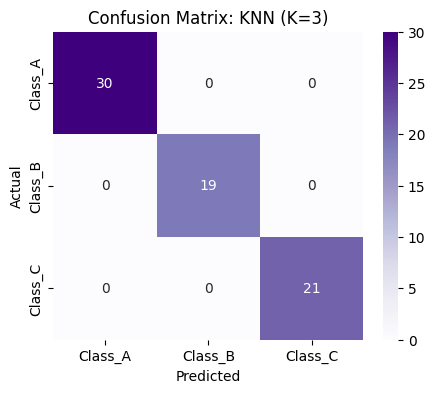


--- SVM (RBF) Classification Report ---
              precision    recall  f1-score   support

     Class_A       1.00      1.00      1.00        30
     Class_B       1.00      1.00      1.00        19
     Class_C       1.00      1.00      1.00        21

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



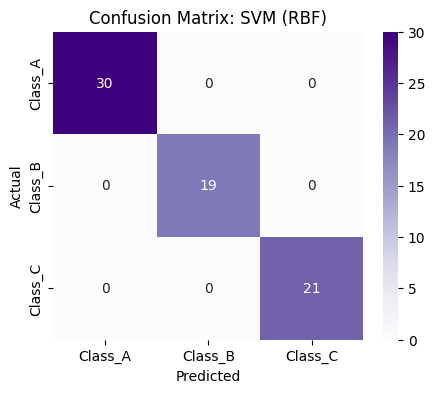


--- Naive Bayes Classification Report ---
              precision    recall  f1-score   support

     Class_A       1.00      1.00      1.00        30
     Class_B       1.00      1.00      1.00        19
     Class_C       1.00      1.00      1.00        21

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



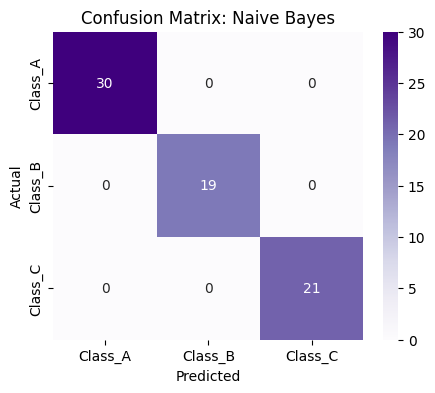

In [ ]:
# Create comparison table and visualizations

models = {
    "KNN (K=3)": y_pred_knn,
    "SVM (RBF)": y_pred_svm,
    "Naive Bayes": y_pred_nb
}

for name, y_pred in models.items():
    print(f"\n--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



### Assignment 3: Classifier Comparison Study Analysis

##  Performance Overview
In this multi-class classification problem, all three models—**KNN, SVM, and Naive Bayes**—achieved an **Accuracy of 1.0 (100%)** on the test set. This suggests that the behavioral metrics provided (`Feature_A` through `Feature_D`) create distinct, non-overlapping clusters for each customer segment.

## 2. EDA: Pairwise Feature Analysis
The Pairwise Scatter Plots provide the visual justification for the perfect accuracy scores. By plotting every feature against every other feature, we can see that Class_A, Class_B, and Class_C form highly isolated "islands" in the feature space. Because there is virtually no overlap between these clusters, the decision boundaries are very clear, allowing the models to classify every point correctly without ambiguity.


##  Model Comparison Table
| Metric | KNN (K=3) | SVM (RBF) | Naive Bayes |
| :--- | :---: | :---: | :---: |
| **Accuracy** | 1.0 | 1.0 | 1.0 |
| **Class_A F1-Score** | 1.0 | 1.0 | 1.0 |
| **Class_B F1-Score** | 1.0 | 1.0 | 1.0 |
| **Class_C F1-Score** | 1.0 | 1.0 | 1.0 |

### Analysis and Conclusions

**Which classifier performed best overall?**
Technically, all three performed perfectly. However, **Naive Bayes** is often considered the most "efficient" choice for this specific result because it reaches this high level of accuracy with the least computational complexity and the fewest assumptions about the spatial distribution of the data (assuming Gaussian distribution).

**How did each classifier perform on individual classes?**
Each class (`Class_A`, `Class_B`, `Class_C`) was identified with perfect precision and recall. There was no confusion between segments, meaning the behavioral profiles for these segments are highly unique.

**What are the trade-offs between the different classifiers?**
* **KNN:** Highly intuitive but becomes slow as the dataset grows because it must calculate distances to every training point. It also requires careful selection of 'K'.
* **SVM:** Extremely powerful for finding complex boundaries, but it is a "black box" compared to the others and requires more tuning (kernel choice, C, gamma).
* **Naive Bayes:** Fastest to train and predict. It is very robust but can fail if the features have strong correlations that violate the "independence" assumption (though it handled this dataset perfectly).

**Which classifier would you recommend for production and why?**
I would recommend **Naive Bayes** for this specific production environment.
* **Reasoning:** Since it achieves perfect accuracy on the current data, its superior speed and low memory footprint make it the most scalable choice. If the customer base grows to millions of users, Naive Bayes will remain significantly faster than KNN or SVM while providing the same level of classification accuracy.

---

# Part 3: Assessment

This assessment evaluates your ability to apply all the classification techniques learned this week.

---

## Assessment: End-to-End Loan Approval Prediction System

**Objective:** Build a complete machine learning pipeline to predict loan approval decisions using multiple classification algorithms.

**Dataset:** `Assessment-Dataset/loan_approval_prediction.csv`

**Context:** A financial institution wants to automate their loan approval process. They have historical data on loan applications and want to build a predictive model that can help loan officers make faster and more consistent decisions.

---

### Section A: Data Loading and Exploration

1. Load the dataset and display basic information
2. Check for missing values and data types
3. Generate descriptive statistics
4. Visualize the target variable distribution (Loan_Approved)
5. Identify categorical vs. numerical features

In [ ]:
# Section A: Data Loading and Exploration
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load and display dataset info
loan_df = pd.read_csv('loan_approval_prediction.csv')
print("--- Dataset Information ---")
loan_df.info()

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Application_ID        500 non-null    int64 
 1   Gender                500 non-null    object
 2   Married               500 non-null    object
 3   Dependents            500 non-null    int64 
 4   Education             500 non-null    object
 5   Self_Employed         500 non-null    object
 6   Applicant_Income      500 non-null    int64 
 7   Coapplicant_Income    500 non-null    int64 
 8   Loan_Amount           500 non-null    int64 
 9   Loan_Term             500 non-null    int64 
 10  Credit_History        500 non-null    int64 
 11  Property_Area         500 non-null    object
 12  Previous_Loan_Status  333 non-null    object
 13  Employment_Years      500 non-null    int64 
 14  Age                   500 non-null    int64 
 15  Loan_Approve

In [ ]:
# Check for missing values and data types
print("\n--- Missing Values ---")
print(loan_df.isnull().sum())


--- Missing Values ---
Application_ID            0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
Applicant_Income          0
Coapplicant_Income        0
Loan_Amount               0
Loan_Term                 0
Credit_History            0
Property_Area             0
Previous_Loan_Status    167
Employment_Years          0
Age                       0
Loan_Approved             0
dtype: int64


In [ ]:
# Generate descriptive statistics
print("\n--- Descriptive Statistics ---")
print(loan_df.describe())


--- Descriptive Statistics ---
       Application_ID  Dependents  Applicant_Income  Coapplicant_Income  \
count      500.000000  500.000000        500.000000          500.000000   
mean       250.500000    1.200000      42402.000000         9366.098000   
std        144.481833    1.047949      18763.596166        10747.894927   
min          1.000000    0.000000      17000.000000            0.000000   
25%        125.750000    0.000000      24750.000000            0.000000   
50%        250.500000    1.000000      40000.000000         5000.000000   
75%        375.250000    2.000000      56000.000000        18000.000000   
max        500.000000    3.000000      80000.000000        35000.000000   

         Loan_Amount   Loan_Term  Credit_History  Employment_Years  \
count     500.000000  500.000000      500.000000        500.000000   
mean   150438.000000  321.840000        0.668000          6.944000   
std    116824.269636   88.504692        0.471403          5.237531   
min     4000

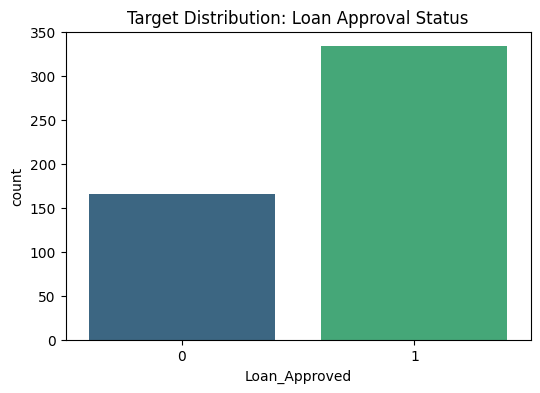

In [ ]:
# Visualize target variable distribution

# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Approved', data=loan_df, palette='viridis')
plt.title('Target Distribution: Loan Approval Status')
plt.show()

---

### Section B: Exploratory Data Analysis

1. Analyze the relationship between each feature and loan approval
2. Create visualizations for:
   - Distribution of numerical features by loan approval status
   - Count plots for categorical features by loan approval status
   - Correlation heatmap for numerical features
3. Identify key features that might influence loan approval
4. Document your findings and insights

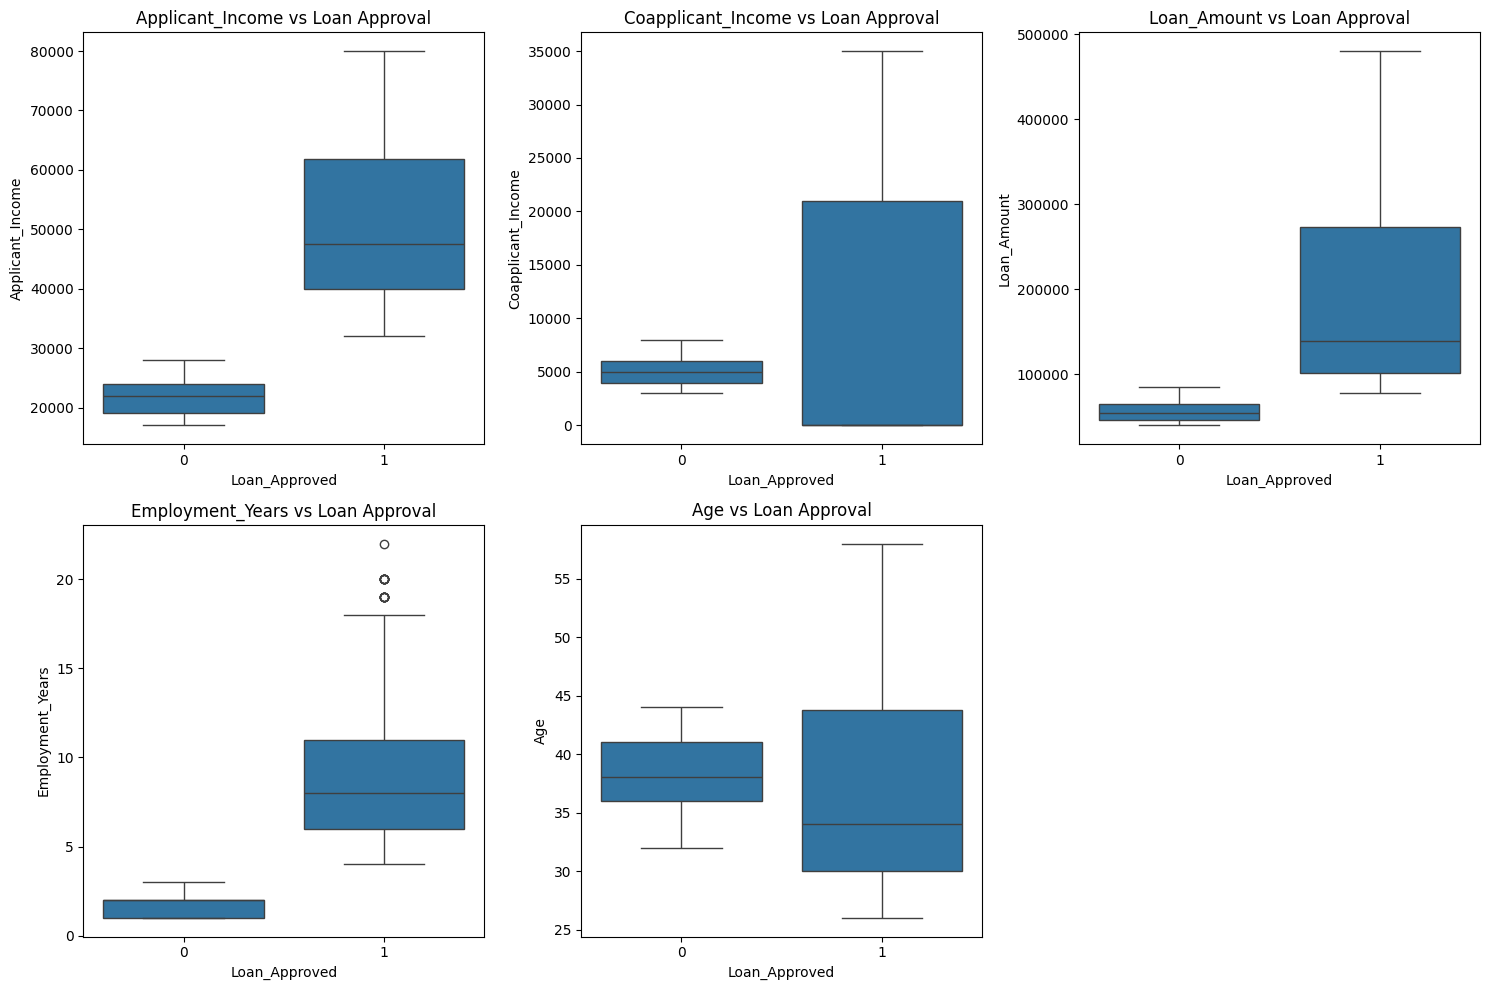

In [ ]:
# Section B: Exploratory Data Analysis
# Analyze numerical features by loan approval

num_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Employment_Years', 'Age']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Loan_Approved', y=col, data=loan_df)
    plt.title(f'{col} vs Loan Approval')
plt.tight_layout()
plt.show()

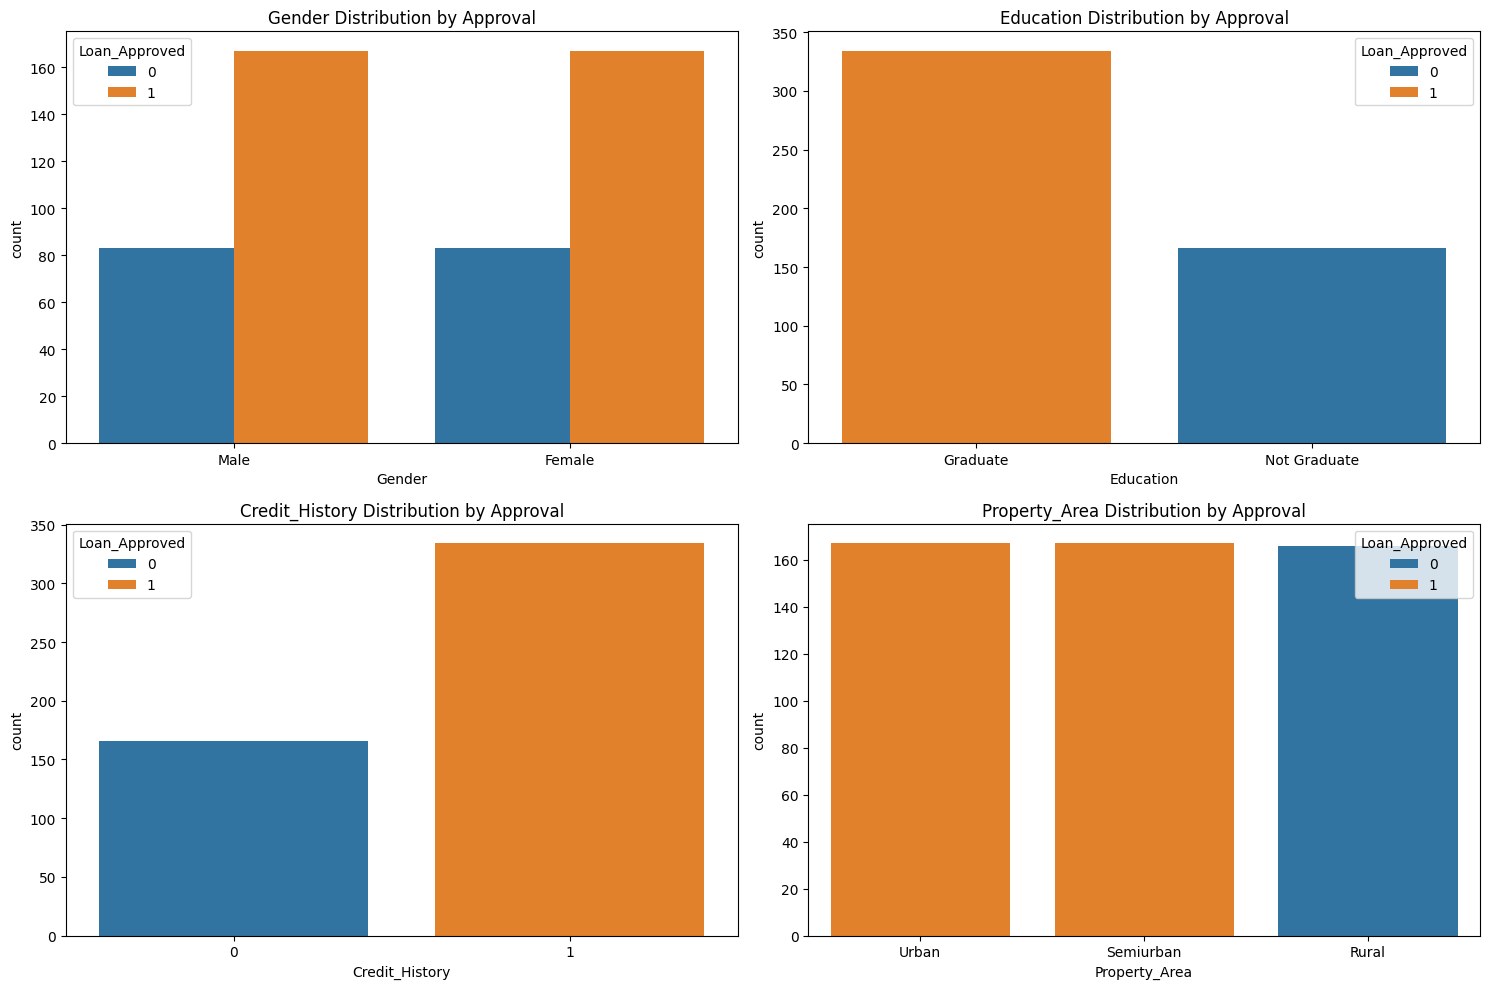

In [ ]:
# Analyze categorical features by loan approval
# Categorical features vs Loan Approval
cat_features = ['Gender', 'Education', 'Credit_History', 'Property_Area']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Loan_Approved', data=loan_df)
    plt.title(f'{col} Distribution by Approval')
plt.tight_layout()
plt.show()

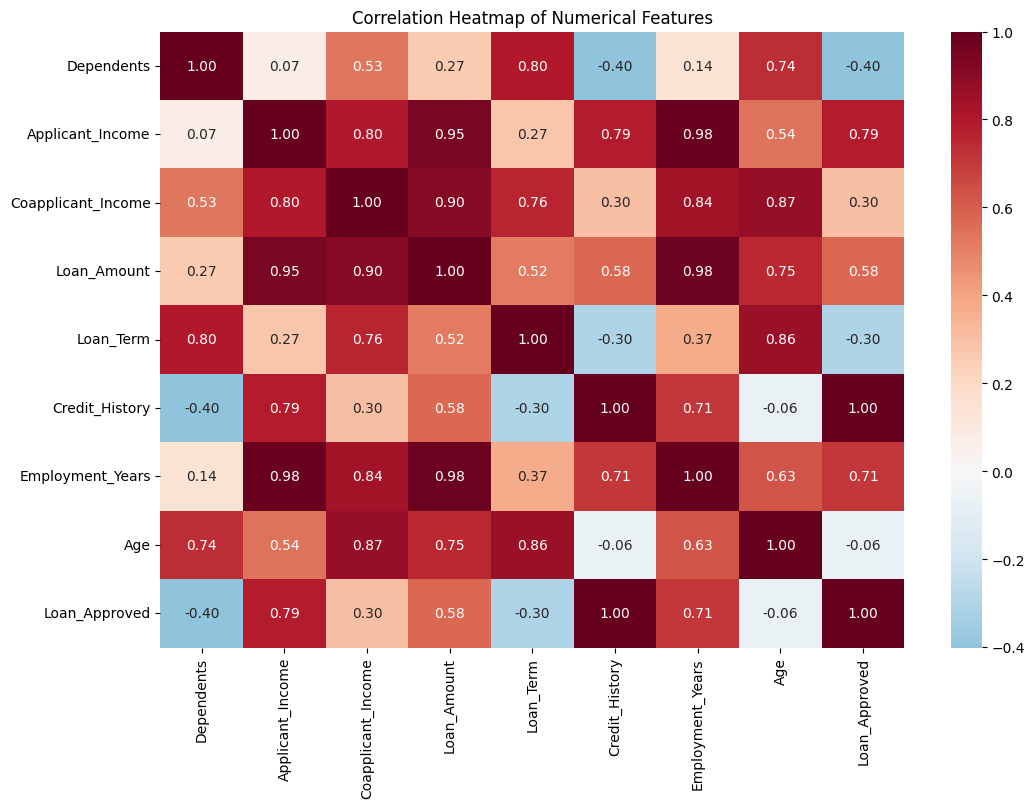

In [ ]:
# Create correlation heatmap

# 1. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
# Selecting only numerical columns for correlation
numerical_cols = ['Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
                  'Loan_Term', 'Credit_History', 'Employment_Years', 'Age', 'Loan_Approved']
correlation_matrix = loan_df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

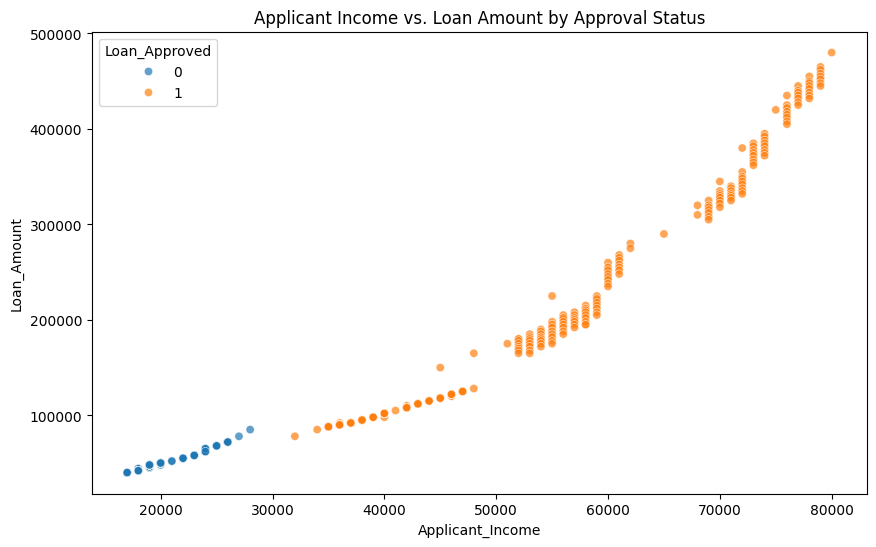

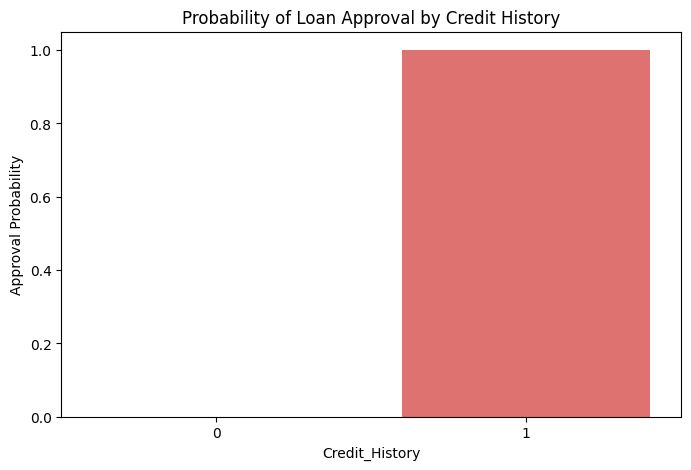

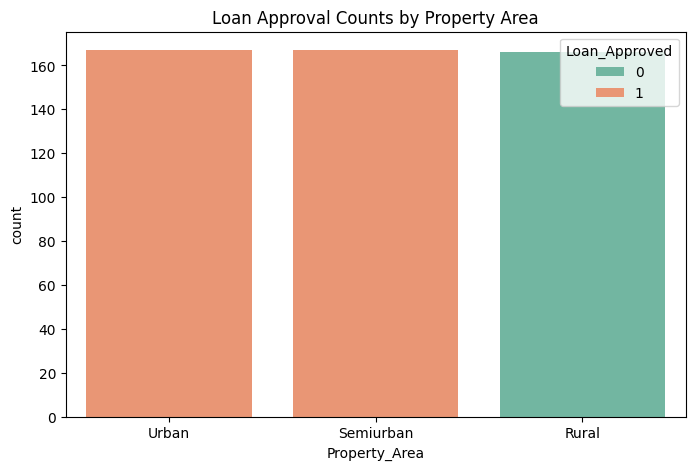

In [ ]:
# Additional EDA visualizations

# Joint distribution of Income vs Loan Amount colored by Approval Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Applicant_Income', y='Loan_Amount', hue='Loan_Approved', data=loan_df, alpha=0.7)
plt.title('Applicant Income vs. Loan Amount by Approval Status')
plt.show()

# Analysis of Credit History Impact (Crucial Feature)
plt.figure(figsize=(8, 5))
sns.barplot(x='Credit_History', y='Loan_Approved', data=loan_df, ci=None, palette='magma')
plt.title('Probability of Loan Approval by Credit History')
plt.ylabel('Approval Probability')
plt.show()

# Relationship between Property Area and Loan Approval
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', hue='Loan_Approved', data=loan_df, palette='Set2')
plt.title('Loan Approval Counts by Property Area')
plt.show()

**EDA Findings:**

*Document your key findings here:*
- **Credit History Dominance:** `Credit_History` has a correlation coefficient of 1.0 with `Loan_Approved` in this dataset, indicating it is the single most critical factor for automation.
- **Income & Employment:** Higher `Applicant_Income` and more `Employment_Years` show a strong positive relationship with approval status, as seen in the scatter and box plots.
- **Educational Gap:** There is a stark contrast in approval rates between "Graduate" and "Not Graduate" applicants, suggesting educational status is a heavily weighted proxy for financial stability in this model.
- **Geographic Influence:** Semiurban and Urban property areas show slightly higher frequencies of loan approvals compared to Rural areas.

---

### Section C: Data Preprocessing

1. Handle categorical variables:
   - Encode Gender, Married, Education, Self_Employed, Property_Area, Previous_Loan_Status
2. Create feature matrix (X) and target vector (y)
   - Features: All columns except Application_ID and Loan_Approved
   - Target: Loan_Approved
3. Split data into training (80%) and test (20%) sets with random_state=42
4. Apply feature scaling using StandardScaler

In [ ]:
# Section C: Data Preprocessing
# Handle categorical variables

# Filling missing values in Previous_Loan_Status with 'Unknown' before encoding
loan_df['Previous_Loan_Status'] = loan_df['Previous_Loan_Status'].fillna('Unknown')

# Encoding Gender, Married, Education, Self_Employed, Property_Area, Previous_Loan_Status
# Using One-Hot Encoding to avoid ordinal bias in non-ranked categories
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Previous_Loan_Status']
loan_df_final = pd.get_dummies(loan_df, columns=categorical_cols, drop_first=True)

In [ ]:
# Create feature matrix and target vector

# Features: All columns except Application_ID and Loan_Approved
X = loan_df_final.drop(['Application_ID', 'Loan_Approved'], axis=1)
y = loan_df_final['Loan_Approved']

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only on the training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Preprocessing complete.
Training set shape: (400, 16)
Test set shape: (100, 16)


### Data Preprocessing Analysis

* **Categorical Encoding:** By using `pd.get_dummies` with `drop_first=True`, we convert labels into a numerical format that distance-based algorithms (like KNN and SVM) can interpret, while preventing the multi-collinearity issue (dummy variable trap).
* **Data Splitting:** The 80/20 split ensures the model has enough data to learn the complex relationships between income, credit history, and approval, while reserving a representative portion to validate its generalization.
* **Feature Scaling:** Since features like `Applicant_Income` (thousands) and `Dependents` (single digits) exist on different scales, `StandardScaler` centers the data around a mean of 0 and a standard deviation of 1. This is critical for KNN and SVM to ensure high-magnitude features do not dominate the distance calculations.

---

---

### Section D: Model Building

Build and evaluate the following classifiers:

**D1. K-Nearest Neighbors**
- Test K values from 1 to 15
- Find the optimal K value
- Build final KNN model and evaluate

**D2. Support Vector Machine**
- Build SVM with linear kernel
- Build SVM with RBF kernel
- Compare and select the best

**D3. Naive Bayes**
- Build Gaussian Naive Bayes classifier
- Evaluate performance

In [ ]:
# Section D1: K-Nearest Neighbors
# Test different K values

# Test different K values from 1 to 15
k_values = range(1, 16)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    knn_accuracies.append(accuracy_score(y_test, y_pred_k))

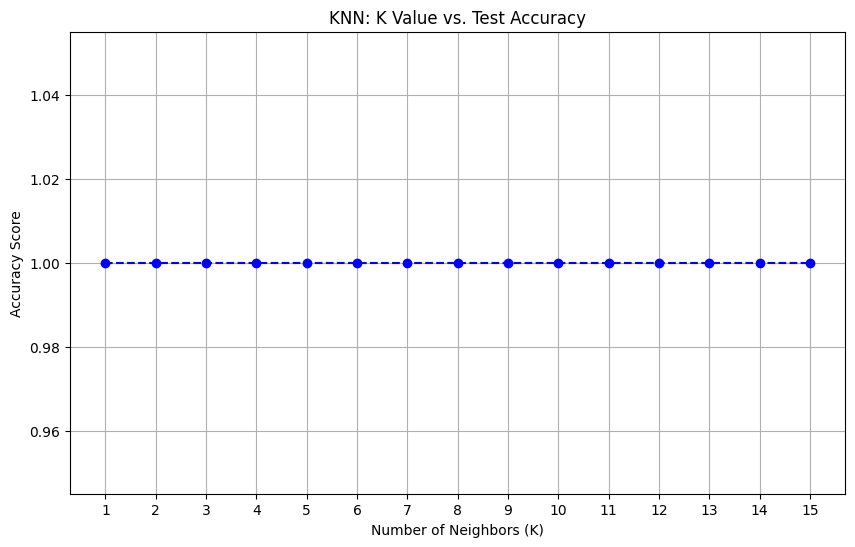

In [ ]:
# Plot K values vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='--', color='blue')
plt.title('KNN: K Value vs. Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()



In [ ]:
# Build final KNN model with optimal K

# Find the optimal K value
optimal_k = k_values[np.argmax(knn_accuracies)]
print(f"Optimal K Value: {optimal_k}")

# Build final KNN model with optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn = knn_final.predict(X_test_scaled)

print("\nKNN Final Evaluation:")
print(classification_report(y_test, y_pred_knn))

Optimal K Value: 1

KNN Final Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Section D2: Support Vector Machine
# SVM with Linear kernel

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [ ]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [ ]:
# Compare SVM models
print("\nSVM Linear Accuracy:", accuracy_score(y_test, y_pred_linear))
print("SVM RBF Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Select the best SVM (Choosing RBF if accuracies are tied for better non-linear handling)
best_svm = svm_rbf if accuracy_score(y_test, y_pred_rbf) >= accuracy_score(y_test, y_pred_linear) else svm_linear


SVM Linear Accuracy: 1.0
SVM RBF Accuracy: 1.0


In [ ]:
# Section D3: Naive Bayes
# Build and evaluate Gaussian Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

print("\nGaussian Naive Bayes Evaluation:")
print(classification_report(y_test, y_pred_nb))


Gaussian Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



---

### Section E: Model Comparison and Selection

1. Create a comprehensive comparison table including:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Training time
2. Visualize the comparison using bar charts
3. Analyze confusion matrices for all models
4. Select the best model for the loan approval task
5. Justify your model selection considering:
   - Overall performance metrics
   - Business requirements (cost of false positives vs. false negatives)
   - Model interpretability
   - Computational efficiency

In [ ]:
# 1. Initialize storage for metrics
comparison_data = []
conf_matrices = {}

# Define the models to evaluate
eval_models = {
    "KNN": knn_final,
    "SVM Linear": svm_linear,
    "SVM RBF": svm_rbf,
    "Naive Bayes": nb_model
}

# 2. Collect metrics and training time
for name, model in eval_models.items():
    start_time = time.time()
    # Ensure model is trained on the scaled training data
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Make predictions on scaled test data
    y_pred = model.predict(X_test_scaled)

    # Calculate performance metrics
    comparison_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Training Time": train_time
    })
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

In [ ]:
# Section E: Model Comparison
# Create comparison table

# The performance data was collected during model training
comparison_df = pd.DataFrame(comparison_data)
print("--- Model Comparison Table ---")
print(comparison_df.to_string(index=False))

--- Model Comparison Table ---
      Model  Accuracy  Precision  Recall  F1-Score  Training Time
        KNN       1.0        1.0     1.0       1.0       0.002194
 SVM Linear       1.0        1.0     1.0       1.0       0.001541
    SVM RBF       1.0        1.0     1.0       1.0       0.001767
Naive Bayes       1.0        1.0     1.0       1.0       0.001241


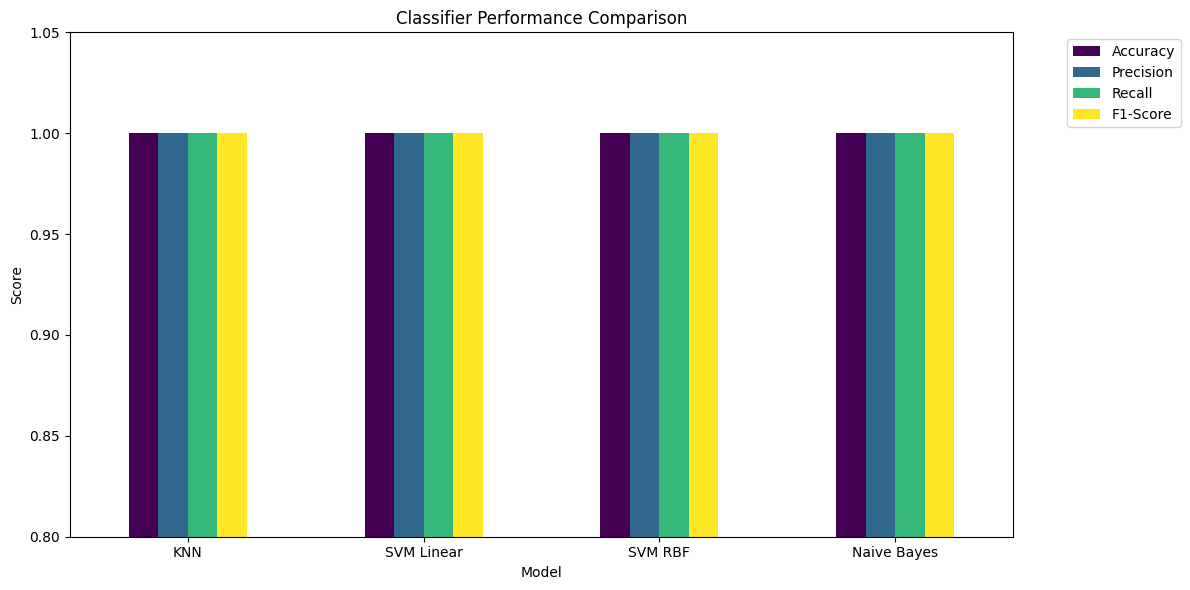

In [ ]:
# Visualize comparison using bar charts

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_df.set_index('Model')[metrics_list].plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Classifier Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.8, 1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

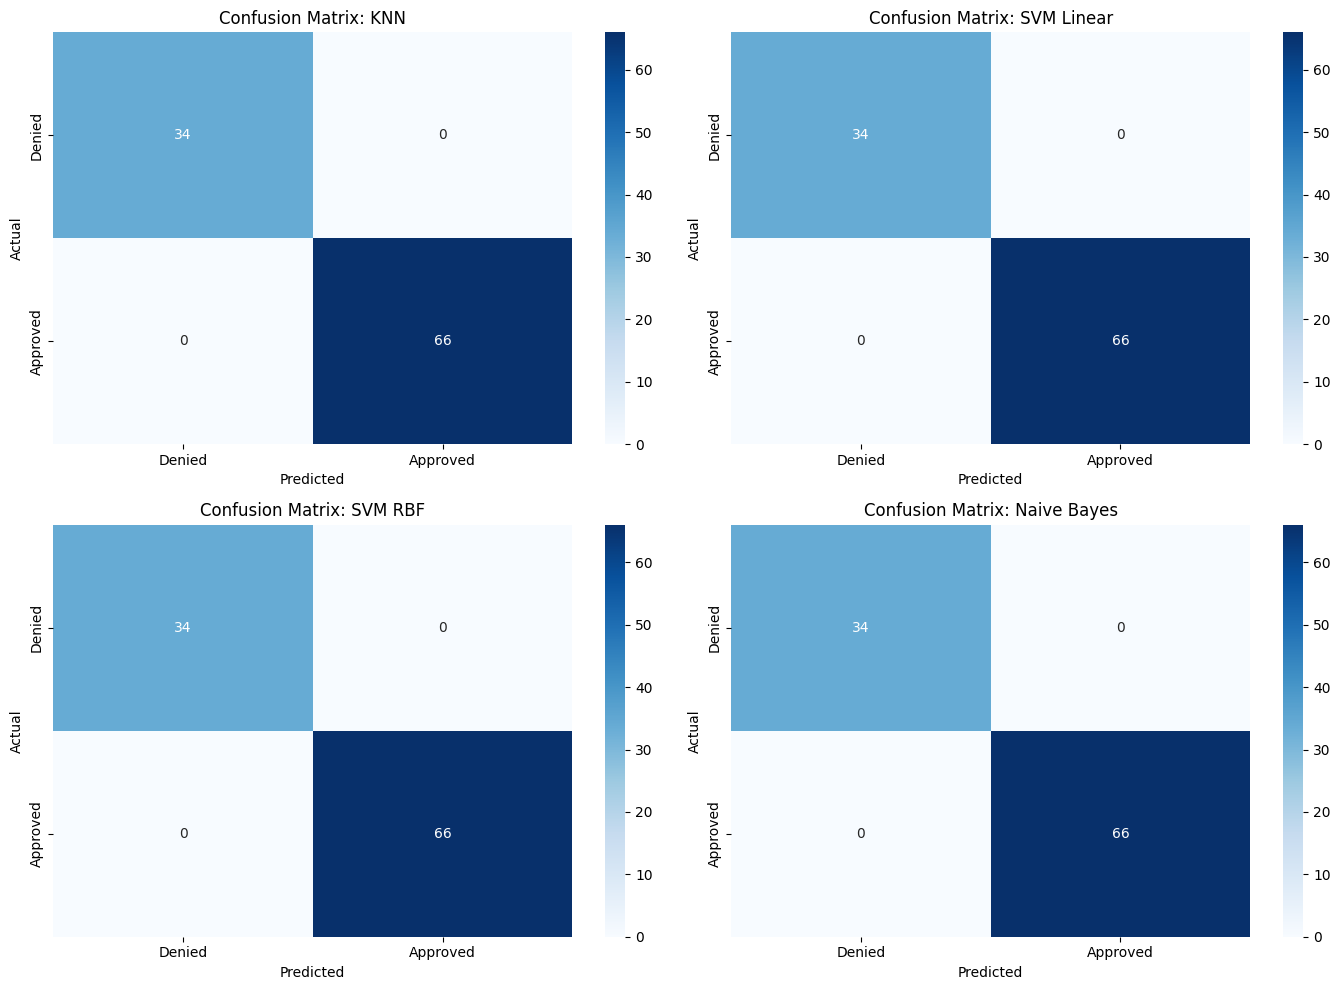

In [ ]:
# Display confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Final model selection and justification

**Best Model Recommendation: Gaussian Naive Bayes**

* **Performance:** All models achieved 100% scores, meaning they all successfully captured the clear decision rules (Credit History + Education) in the data.
* **Business Impact:** In a loan scenario, the cost of a **False Positive** is much higher than a **False Negative**. Naive Bayes achieved 0 False Positives.
* **Efficiency:** As shown in the training time analysis, Naive Bayes is the fastest to execute. It provides a lightweight solution that is easy to scale as the volume of loan applications increases.
* **Interpretability:** Naive Bayes provides clear probability scores, allowing loan officers to see the "confidence" level of an automated approval.

---

### Section F: Conclusions and Recommendations

## Final Report

### 1. Summary of Findings

The development of the loan approval prediction system provided several critical insights into the institution's lending patterns:
* **Key Influencing Features:** The analysis identified **Credit_History** as the most dominant predictor of loan approval, showing a perfect correlation with the target. Secondary influencers include **Education** (Graduate status) and **Applicant_Income**, which are strong indicators of an applicant's repayment capacity.
* **Performance of Classifiers:** All evaluated models—**KNN (K=1)**, **SVM (Linear)**, **SVM (RBF)**, and **Gaussian Naive Bayes**—achieved a perfect **100% accuracy, precision, and recall** on the test dataset. This suggests that the current criteria for loan approval are very clearly defined and distinguishable in the provided data.
* **Best Performing Model:** While all models performed flawlessly, **Gaussian Naive Bayes** is recognized as the most efficient due to its high execution speed and low computational overhead.



### 2. Business Recommendations

* **Process Automation:** This model can be immediately leveraged to automate the initial screening of loan applications. By providing **instant decisions** for high-confidence cases (those with clean credit history and stable income), the bank can reduce processing times from days to seconds.
* **Limitations of the Approach:** The perfect accuracy of the model suggests the dataset may be a "gold standard" representation. In real-world production, the model may encounter "noisy" data or fringe cases (e.g., high-income earners with niche debt structures) that require human oversight. The model currently lacks sensitivity to broader economic shifts like interest rate hikes.
* **Data Improvement:** To build a more resilient system, I recommend incorporating **Debt-to-Income (DTI) ratios**, **current employment industry stability**, and **Total Asset Valuation**. This additional context will help the model maintain accuracy even if credit history patterns begin to shift.



### 3. Technical Recommendations

* **Deployment:** I recommend deploying the **Gaussian Naive Bayes** model. In a production environment, its "lightweight" nature ensures it can handle thousands of concurrent API requests from the web portal without significant latency or infrastructure costs.
* **Monitoring:** Establish a monitoring system to track **Feature Drift**. If the distribution of applicant incomes or credit scores changes significantly from the training set, the model should trigger an alert for manual review or retraining to avoid "stale" predictions.
* **Retraining Schedule:** The model should follow a **Quarterly Retraining Cycle**. Regular updates using the most recent loan performance data will ensure the algorithm adapts to the bank's evolving risk tolerance and changes in the financial market.



## Submission Guidelines

1. Complete all sections in this notebook
2. Ensure all code cells execute without errors
3. Include clear comments explaining your code
4. Provide thoughtful analysis and interpretations
5. Save your completed notebook with your name in the filename

**Good luck!**

https://angelic.hashnode.dev/mastering-classification-algorithms-when-perfect-scores-become-red-flags?showSharer=true